<a href="https://colab.research.google.com/github/hidayetyakupoglu/Anomaly-Detection/blob/master/windyT06_ipynb_adl%C4%B1_not_defterinin_kopyas%C4%B1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
!pip install scikit-learn==1.0.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.5/26.5 MB 24.9 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 1.4.0 requires scikit-learn>=1.2.2, but you have scikit-learn 1.0.2 which is incompatible.


In [1]:
import os
import pandas as pd
import numpy as np
from scipy import stats
from sklearn import preprocessing
import random
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import joblib
import seaborn as sns
sns.set(color_codes=True)
import matplotlib.pyplot as plt


from numpy.random import seed
import tensorflow as tf
#import logging
#logging.basicConfig(level=logging.DEBUG)
#tf._logging.set_verbosity(tf._logging.error)

#tensorflow.random.set_seed
from keras.layers import Input, Dropout, Dense, LSTM, TimeDistributed, RepeatVector
from keras.models import Model
from keras import regularizers

from sklearn.metrics import plot_confusion_matrix, classification_report
import plotly.express as px
from sklearn.preprocessing import Normalizer

from keras.layers import Dense
from keras.models import Sequential



from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

from scipy.spatial.distance import mahalanobis

import xgboost as xgb
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix, classification_report

from sklearn.neighbors import KNeighborsClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.feature_selection import (f_classif, SelectKBest)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from lightgbm import LGBMClassifier
from sklearn import metrics

from sklearn.feature_extraction.text import CountVectorizer


from imblearn.over_sampling import SMOTE

from matplotlib import pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
#scada = pd.read_csv('Turbine6.csv', parse_dates=['Timestamp'])
scada2=pd.read_excel('T06_2016.xlsx')

In [8]:
scada1=pd.read_excel('T06_2017.xlsx')

In [9]:
faults2= pd.read_excel('wind_failures_2017.xlsx', parse_dates=['Timestamp'])
faults1= pd.read_excel('wind_failures_2016.xlsx', parse_dates=['Timestamp'])

In [142]:
scada1

,Turbine_ID,Timestamp,Gen_RPM_Max,Gen_RPM_Min,Gen_RPM_Avg,Gen_RPM_Std,Gen_Bear_Temp_Avg,Gen_Phase1_Temp_Avg,Gen_Phase2_Temp_Avg,Gen_Phase3_Temp_Avg,...,Grd_Prod_PsbleInd_Avg,Grd_Prod_PsbleInd_Max,Grd_Prod_PsbleInd_Min,Grd_Prod_PsbleInd_Std,Grd_Prod_PsbleCap_Avg,Grd_Prod_PsbleCap_Max,Grd_Prod_PsbleCap_Min,Grd_Prod_PsbleCap_Std,Gen_Bear2_Temp_Avg,Nac_Direction_Avg
0,T06,2017-12-29T20:30:00+00:00,1344.0,265.3,647.1,476.4,43.0,56,57,57,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39,277.4
1,T06,2017-12-29T20:40:00+00:00,311.0,275.0,293.1,8.9,43.0,53,54,53,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,38,281.2
2,T06,2017-12-29T21:10:00+00:00,1433.2,266.5,475.6,383.1,40.0,48,49,49,...,-60.7,0.0,-594.7,154.7,60.7,594.7,0.0,154.7,36,314.6
3,T06,2017-12-29T21:20:00+00:00,1272.4,988.6,1222.7,65.1,38.0,48,49,49,...,-147.4,0.0,-423.5,142.7,147.4,423.5,0.0,142.7,36,317.1
4,T06,2017-12-29T21:50:00+00:00,1268.4,1051.9,1200.5,65.3,36.0,46,47,47,...,-156.3,0.0,-776.3,240.3,156.3,776.3,0.0,240.3,35,315.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52341,T06,2017-02-15T16:00:00+00:00,1758.3,1600.0,1680.0,25.0,69.0,111,110,111,...,-583.3,-583.3,-592.9,0.1,406.1,411.1,406.1,0.1,60,100.5
52342,T06,2017-05-31T08:50:00+00:00,1753.0,1615.4,1670.8,21.3,60.0,89,88,89,...,-764.8,-583.3,-1000.0,188.8,579.1,1000.0,406.1,217.9,62,90.0
52343,T06,2017-02-15T17:00:00+00:00,1796.2,1618.9,1680.9,23.9,69.0,110,110,111,...,-620.8,-583.3,-1000.0,104.4,433.2,1000.0,406.1,88.3,59,101.9
52344,T06,2017-06-03T00:20:00+00:00,0.0,0.0,0.0,0.0,42.0,45,46,46,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,36,90.3


In [143]:
scada2

,Turbine_ID,Timestamp,Gen_RPM_Max,Gen_RPM_Min,Gen_RPM_Avg,Gen_RPM_Std,Gen_Bear_Temp_Avg,Gen_Phase1_Temp_Avg,Gen_Phase2_Temp_Avg,Gen_Phase3_Temp_Avg,...,Grd_Prod_PsbleInd_Avg,Grd_Prod_PsbleInd_Max,Grd_Prod_PsbleInd_Min,Grd_Prod_PsbleInd_Std,Grd_Prod_PsbleCap_Avg,Grd_Prod_PsbleCap_Max,Grd_Prod_PsbleCap_Min,Grd_Prod_PsbleCap_Std,Gen_Bear2_Temp_Avg,Nac_Direction_Avg
0,T06,2016-01-08T23:10:00+00:00,1634.3,1226.9,1416.4,96.4,49,62,63,64,...,-998.7,-649.2,-1000.0,18.5,998.7,1000.0,649.2,18.5,40,207.1
1,T06,2016-04-19T12:20:00+00:00,1796.1,1597.0,1680.0,29.8,66,97,107,111,...,-615.2,-583.3,-1000.0,91.9,423.8,783.5,406.1,52.7,57,129.9
2,T06,2016-01-09T00:20:00+00:00,1684.6,1290.7,1530.1,113.2,48,63,64,65,...,-998.5,-726.8,-1000.0,17.6,987.1,1000.0,481.4,58.4,38,206.0
3,T06,2016-04-19T13:50:00+00:00,1661.9,1361.6,1549.6,73.2,56,70,74,77,...,-1000.0,-1000.0,-1000.0,0.0,1000.0,1000.0,1000.0,0.0,52,143.6
4,T06,2016-01-09T01:00:00+00:00,1673.6,1295.0,1545.8,83.4,48,62,63,64,...,-1000.0,-1000.0,-1000.0,0.0,999.4,1000.0,927.5,5.2,37,229.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50570,T06,2016-10-22T08:30:00+00:00,1555.7,1216.7,1295.6,57.7,47,60,60,57,...,-920.2,-250.9,-1000.0,181.0,920.2,1000.0,250.9,181.0,41,161.8
50571,T06,2016-10-22T09:10:00+00:00,1588.2,1200.3,1291.7,83.4,47,59,60,57,...,-601.2,0.0,-1000.0,357.9,601.2,1000.0,0.0,357.9,41,174.1
50572,T06,2016-10-22T09:30:00+00:00,1498.5,1214.4,1285.1,64.8,47,59,60,57,...,-699.9,0.0,-1000.0,304.5,699.9,1000.0,0.0,304.5,41,167.8
50573,T06,2016-10-22T10:40:00+00:00,1555.5,1194.1,1301.3,75.6,48,60,61,58,...,-891.2,-143.3,-1000.0,168.7,891.2,1000.0,143.3,168.7,41,174.4


In [144]:
scada = pd.concat([scada1, scada2], ignore_index=True)

In [145]:
scada

,Turbine_ID,Timestamp,Gen_RPM_Max,Gen_RPM_Min,Gen_RPM_Avg,Gen_RPM_Std,Gen_Bear_Temp_Avg,Gen_Phase1_Temp_Avg,Gen_Phase2_Temp_Avg,Gen_Phase3_Temp_Avg,...,Grd_Prod_PsbleInd_Avg,Grd_Prod_PsbleInd_Max,Grd_Prod_PsbleInd_Min,Grd_Prod_PsbleInd_Std,Grd_Prod_PsbleCap_Avg,Grd_Prod_PsbleCap_Max,Grd_Prod_PsbleCap_Min,Grd_Prod_PsbleCap_Std,Gen_Bear2_Temp_Avg,Nac_Direction_Avg
0,T06,2017-12-29T20:30:00+00:00,1344.0,265.3,647.1,476.4,43.0,56,57,57,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39,277.4
1,T06,2017-12-29T20:40:00+00:00,311.0,275.0,293.1,8.9,43.0,53,54,53,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,38,281.2
2,T06,2017-12-29T21:10:00+00:00,1433.2,266.5,475.6,383.1,40.0,48,49,49,...,-60.7,0.0,-594.7,154.7,60.7,594.7,0.0,154.7,36,314.6
3,T06,2017-12-29T21:20:00+00:00,1272.4,988.6,1222.7,65.1,38.0,48,49,49,...,-147.4,0.0,-423.5,142.7,147.4,423.5,0.0,142.7,36,317.1
4,T06,2017-12-29T21:50:00+00:00,1268.4,1051.9,1200.5,65.3,36.0,46,47,47,...,-156.3,0.0,-776.3,240.3,156.3,776.3,0.0,240.3,35,315.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102916,T06,2016-10-22T08:30:00+00:00,1555.7,1216.7,1295.6,57.7,47.0,60,60,57,...,-920.2,-250.9,-1000.0,181.0,920.2,1000.0,250.9,181.0,41,161.8
102917,T06,2016-10-22T09:10:00+00:00,1588.2,1200.3,1291.7,83.4,47.0,59,60,57,...,-601.2,0.0,-1000.0,357.9,601.2,1000.0,0.0,357.9,41,174.1
102918,T06,2016-10-22T09:30:00+00:00,1498.5,1214.4,1285.1,64.8,47.0,59,60,57,...,-699.9,0.0,-1000.0,304.5,699.9,1000.0,0.0,304.5,41,167.8
102919,T06,2016-10-22T10:40:00+00:00,1555.5,1194.1,1301.3,75.6,48.0,60,61,58,...,-891.2,-143.3,-1000.0,168.7,891.2,1000.0,143.3,168.7,41,174.4


In [146]:
faults = pd.concat([faults1, faults2], ignore_index=True)

In [147]:
#  T06 a ait olanlar için yeni df oluştur
df1 = faults[faults['Turbine_ID'] == 'T06']
df1

,Turbine_ID,Component,Timestamp,Remarks
1,T06,GENERATOR,2016-07-11 19:48:00+00:00,Generator replaced
2,T06,GENERATOR,2016-07-24 17:01:00+00:00,Generator temperature sensor failure
3,T06,GENERATOR,2016-09-04 08:08:00+00:00,High temperature generator error
4,T06,GENERATOR,2016-10-27 16:26:00+00:00,Generator replaced
5,T06,GENERATOR,2016-10-02 17:08:00+00:00,Refrigeration system and temperature sensors i...
6,T06,HYDRAULIC_GROUP,2016-04-04 18:53:00+00:00,Error in pitch regulation
17,T06,GEARBOX,2017-10-17 08:38:00+00:00,Gearbox bearings damaged
18,T06,HYDRAULIC_GROUP,2017-08-19 09:47:00+00:00,Oil leakage in Hub


In [148]:
#scada = scada[scada['Turbine_ID'] == 'T11']

In [149]:
# prompt: df_T06 daki Timestamp dakikalarını 10'un katı olacak şekilde aşağı yuvarla

df1['Timestamp'] = pd.to_datetime(df1['Timestamp'].dt.floor('10min'))
df1

,Turbine_ID,Component,Timestamp,Remarks
1,T06,GENERATOR,2016-07-11 19:40:00+00:00,Generator replaced
2,T06,GENERATOR,2016-07-24 17:00:00+00:00,Generator temperature sensor failure
3,T06,GENERATOR,2016-09-04 08:00:00+00:00,High temperature generator error
4,T06,GENERATOR,2016-10-27 16:20:00+00:00,Generator replaced
5,T06,GENERATOR,2016-10-02 17:00:00+00:00,Refrigeration system and temperature sensors i...
6,T06,HYDRAULIC_GROUP,2016-04-04 18:50:00+00:00,Error in pitch regulation
17,T06,GEARBOX,2017-10-17 08:30:00+00:00,Gearbox bearings damaged
18,T06,HYDRAULIC_GROUP,2017-08-19 09:40:00+00:00,Oil leakage in Hub


In [150]:
# prompt: set index timestamp

#df_T06 = df_T06.set_index('Timestamp')


In [151]:
scada['Timestamp'] = pd.to_datetime(scada['Timestamp'])

In [152]:
scada


,Turbine_ID,Timestamp,Gen_RPM_Max,Gen_RPM_Min,Gen_RPM_Avg,Gen_RPM_Std,Gen_Bear_Temp_Avg,Gen_Phase1_Temp_Avg,Gen_Phase2_Temp_Avg,Gen_Phase3_Temp_Avg,...,Grd_Prod_PsbleInd_Avg,Grd_Prod_PsbleInd_Max,Grd_Prod_PsbleInd_Min,Grd_Prod_PsbleInd_Std,Grd_Prod_PsbleCap_Avg,Grd_Prod_PsbleCap_Max,Grd_Prod_PsbleCap_Min,Grd_Prod_PsbleCap_Std,Gen_Bear2_Temp_Avg,Nac_Direction_Avg
0,T06,2017-12-29 20:30:00+00:00,1344.0,265.3,647.1,476.4,43.0,56,57,57,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39,277.4
1,T06,2017-12-29 20:40:00+00:00,311.0,275.0,293.1,8.9,43.0,53,54,53,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,38,281.2
2,T06,2017-12-29 21:10:00+00:00,1433.2,266.5,475.6,383.1,40.0,48,49,49,...,-60.7,0.0,-594.7,154.7,60.7,594.7,0.0,154.7,36,314.6
3,T06,2017-12-29 21:20:00+00:00,1272.4,988.6,1222.7,65.1,38.0,48,49,49,...,-147.4,0.0,-423.5,142.7,147.4,423.5,0.0,142.7,36,317.1
4,T06,2017-12-29 21:50:00+00:00,1268.4,1051.9,1200.5,65.3,36.0,46,47,47,...,-156.3,0.0,-776.3,240.3,156.3,776.3,0.0,240.3,35,315.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102916,T06,2016-10-22 08:30:00+00:00,1555.7,1216.7,1295.6,57.7,47.0,60,60,57,...,-920.2,-250.9,-1000.0,181.0,920.2,1000.0,250.9,181.0,41,161.8
102917,T06,2016-10-22 09:10:00+00:00,1588.2,1200.3,1291.7,83.4,47.0,59,60,57,...,-601.2,0.0,-1000.0,357.9,601.2,1000.0,0.0,357.9,41,174.1
102918,T06,2016-10-22 09:30:00+00:00,1498.5,1214.4,1285.1,64.8,47.0,59,60,57,...,-699.9,0.0,-1000.0,304.5,699.9,1000.0,0.0,304.5,41,167.8
102919,T06,2016-10-22 10:40:00+00:00,1555.5,1194.1,1301.3,75.6,48.0,60,61,58,...,-891.2,-143.3,-1000.0,168.7,891.2,1000.0,143.3,168.7,41,174.4


In [153]:
# prompt: df_T06 ile scada yı aynı endekte birleştir

df2 = pd.merge(scada,df1,how='left')


In [154]:
df2

,Turbine_ID,Timestamp,Gen_RPM_Max,Gen_RPM_Min,Gen_RPM_Avg,Gen_RPM_Std,Gen_Bear_Temp_Avg,Gen_Phase1_Temp_Avg,Gen_Phase2_Temp_Avg,Gen_Phase3_Temp_Avg,...,Grd_Prod_PsbleInd_Min,Grd_Prod_PsbleInd_Std,Grd_Prod_PsbleCap_Avg,Grd_Prod_PsbleCap_Max,Grd_Prod_PsbleCap_Min,Grd_Prod_PsbleCap_Std,Gen_Bear2_Temp_Avg,Nac_Direction_Avg,Component,Remarks
0,T06,2017-12-29 20:30:00+00:00,1344.0,265.3,647.1,476.4,43.0,56,57,57,...,0.0,0.0,0.0,0.0,0.0,0.0,39,277.4,NaN,NaN
1,T06,2017-12-29 20:40:00+00:00,311.0,275.0,293.1,8.9,43.0,53,54,53,...,0.0,0.0,0.0,0.0,0.0,0.0,38,281.2,NaN,NaN
2,T06,2017-12-29 21:10:00+00:00,1433.2,266.5,475.6,383.1,40.0,48,49,49,...,-594.7,154.7,60.7,594.7,0.0,154.7,36,314.6,NaN,NaN
3,T06,2017-12-29 21:20:00+00:00,1272.4,988.6,1222.7,65.1,38.0,48,49,49,...,-423.5,142.7,147.4,423.5,0.0,142.7,36,317.1,NaN,NaN
4,T06,2017-12-29 21:50:00+00:00,1268.4,1051.9,1200.5,65.3,36.0,46,47,47,...,-776.3,240.3,156.3,776.3,0.0,240.3,35,315.4,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102916,T06,2016-10-22 08:30:00+00:00,1555.7,1216.7,1295.6,57.7,47.0,60,60,57,...,-1000.0,181.0,920.2,1000.0,250.9,181.0,41,161.8,NaN,NaN
102917,T06,2016-10-22 09:10:00+00:00,1588.2,1200.3,1291.7,83.4,47.0,59,60,57,...,-1000.0,357.9,601.2,1000.0,0.0,357.9,41,174.1,NaN,NaN
102918,T06,2016-10-22 09:30:00+00:00,1498.5,1214.4,1285.1,64.8,47.0,59,60,57,...,-1000.0,304.5,699.9,1000.0,0.0,304.5,41,167.8,NaN,NaN
102919,T06,2016-10-22 10:40:00+00:00,1555.5,1194.1,1301.3,75.6,48.0,60,61,58,...,-1000.0,168.7,891.2,1000.0,143.3,168.7,41,174.4,NaN,NaN


In [155]:
df2[df2['Component'] =='GENERATOR']

,Turbine_ID,Timestamp,Gen_RPM_Max,Gen_RPM_Min,Gen_RPM_Avg,Gen_RPM_Std,Gen_Bear_Temp_Avg,Gen_Phase1_Temp_Avg,Gen_Phase2_Temp_Avg,Gen_Phase3_Temp_Avg,...,Grd_Prod_PsbleInd_Min,Grd_Prod_PsbleInd_Std,Grd_Prod_PsbleCap_Avg,Grd_Prod_PsbleCap_Max,Grd_Prod_PsbleCap_Min,Grd_Prod_PsbleCap_Std,Gen_Bear2_Temp_Avg,Nac_Direction_Avg,Component,Remarks
61186,T06,2016-09-04 08:00:00+00:00,1428.8,1240.8,1272.1,37.3,56.0,71,85,67,...,-1000.0,41.0,978.9,1000.0,800.1,41.0,53,115.2,GENERATOR,High temperature generator error
67884,T06,2016-07-24 17:00:00+00:00,1805.2,1591.1,1681.1,27.6,94.0,122,125,111,...,-1000.0,23.9,407.3,771.3,406.1,16.0,71,100.8,GENERATOR,Generator temperature sensor failure
70697,T06,2016-10-02 17:00:00+00:00,1467.7,1221.6,1279.4,38.9,47.0,55,88,53,...,-1000.0,189.5,925.5,1000.0,12.2,189.5,44,256.5,GENERATOR,Refrigeration system and temperature sensors i...
102908,T06,2016-10-27 16:20:00+00:00,1796.3,1577.8,1677.8,31.0,88.0,130,133,117,...,-1000.0,152.5,469.1,1000.0,406.1,137.4,69,93.1,GENERATOR,Generator replaced


In [156]:
df=df2

In [157]:
# prompt:  Unnamed: 0, Turbine_ID_x, Turbine_ID_y	 ve Remarks sütunlarını çıkart

df = df.drop(columns=['Turbine_ID','Remarks'])


In [158]:
df = df.rename(columns={'Component':'fault'})

In [159]:
df

,Timestamp,Gen_RPM_Max,Gen_RPM_Min,Gen_RPM_Avg,Gen_RPM_Std,Gen_Bear_Temp_Avg,Gen_Phase1_Temp_Avg,Gen_Phase2_Temp_Avg,Gen_Phase3_Temp_Avg,Hyd_Oil_Temp_Avg,...,Grd_Prod_PsbleInd_Max,Grd_Prod_PsbleInd_Min,Grd_Prod_PsbleInd_Std,Grd_Prod_PsbleCap_Avg,Grd_Prod_PsbleCap_Max,Grd_Prod_PsbleCap_Min,Grd_Prod_PsbleCap_Std,Gen_Bear2_Temp_Avg,Nac_Direction_Avg,fault
0,2017-12-29 20:30:00+00:00,1344.0,265.3,647.1,476.4,43.0,56,57,57,29,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39,277.4,NaN
1,2017-12-29 20:40:00+00:00,311.0,275.0,293.1,8.9,43.0,53,54,53,29,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,38,281.2,NaN
2,2017-12-29 21:10:00+00:00,1433.2,266.5,475.6,383.1,40.0,48,49,49,30,...,0.0,-594.7,154.7,60.7,594.7,0.0,154.7,36,314.6,NaN
3,2017-12-29 21:20:00+00:00,1272.4,988.6,1222.7,65.1,38.0,48,49,49,30,...,0.0,-423.5,142.7,147.4,423.5,0.0,142.7,36,317.1,NaN
4,2017-12-29 21:50:00+00:00,1268.4,1051.9,1200.5,65.3,36.0,46,47,47,30,...,0.0,-776.3,240.3,156.3,776.3,0.0,240.3,35,315.4,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102916,2016-10-22 08:30:00+00:00,1555.7,1216.7,1295.6,57.7,47.0,60,60,57,33,...,-250.9,-1000.0,181.0,920.2,1000.0,250.9,181.0,41,161.8,NaN
102917,2016-10-22 09:10:00+00:00,1588.2,1200.3,1291.7,83.4,47.0,59,60,57,33,...,0.0,-1000.0,357.9,601.2,1000.0,0.0,357.9,41,174.1,NaN
102918,2016-10-22 09:30:00+00:00,1498.5,1214.4,1285.1,64.8,47.0,59,60,57,33,...,0.0,-1000.0,304.5,699.9,1000.0,0.0,304.5,41,167.8,NaN
102919,2016-10-22 10:40:00+00:00,1555.5,1194.1,1301.3,75.6,48.0,60,61,58,34,...,-143.3,-1000.0,168.7,891.2,1000.0,143.3,168.7,41,174.4,NaN


In [160]:
# prompt: fault sütununda NaN değerleri yerine NF yaz

df['fault'] = df['fault'].fillna('NF')
df

,Timestamp,Gen_RPM_Max,Gen_RPM_Min,Gen_RPM_Avg,Gen_RPM_Std,Gen_Bear_Temp_Avg,Gen_Phase1_Temp_Avg,Gen_Phase2_Temp_Avg,Gen_Phase3_Temp_Avg,Hyd_Oil_Temp_Avg,...,Grd_Prod_PsbleInd_Max,Grd_Prod_PsbleInd_Min,Grd_Prod_PsbleInd_Std,Grd_Prod_PsbleCap_Avg,Grd_Prod_PsbleCap_Max,Grd_Prod_PsbleCap_Min,Grd_Prod_PsbleCap_Std,Gen_Bear2_Temp_Avg,Nac_Direction_Avg,fault
0,2017-12-29 20:30:00+00:00,1344.0,265.3,647.1,476.4,43.0,56,57,57,29,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39,277.4,NF
1,2017-12-29 20:40:00+00:00,311.0,275.0,293.1,8.9,43.0,53,54,53,29,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,38,281.2,NF
2,2017-12-29 21:10:00+00:00,1433.2,266.5,475.6,383.1,40.0,48,49,49,30,...,0.0,-594.7,154.7,60.7,594.7,0.0,154.7,36,314.6,NF
3,2017-12-29 21:20:00+00:00,1272.4,988.6,1222.7,65.1,38.0,48,49,49,30,...,0.0,-423.5,142.7,147.4,423.5,0.0,142.7,36,317.1,NF
4,2017-12-29 21:50:00+00:00,1268.4,1051.9,1200.5,65.3,36.0,46,47,47,30,...,0.0,-776.3,240.3,156.3,776.3,0.0,240.3,35,315.4,NF
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102916,2016-10-22 08:30:00+00:00,1555.7,1216.7,1295.6,57.7,47.0,60,60,57,33,...,-250.9,-1000.0,181.0,920.2,1000.0,250.9,181.0,41,161.8,NF
102917,2016-10-22 09:10:00+00:00,1588.2,1200.3,1291.7,83.4,47.0,59,60,57,33,...,0.0,-1000.0,357.9,601.2,1000.0,0.0,357.9,41,174.1,NF
102918,2016-10-22 09:30:00+00:00,1498.5,1214.4,1285.1,64.8,47.0,59,60,57,33,...,0.0,-1000.0,304.5,699.9,1000.0,0.0,304.5,41,167.8,NF
102919,2016-10-22 10:40:00+00:00,1555.5,1194.1,1301.3,75.6,48.0,60,61,58,34,...,-143.3,-1000.0,168.7,891.2,1000.0,143.3,168.7,41,174.4,NF


In [161]:
# prompt: fault sütununda NF olmayanları göster

df[df['fault'] !='NF']


,Timestamp,Gen_RPM_Max,Gen_RPM_Min,Gen_RPM_Avg,Gen_RPM_Std,Gen_Bear_Temp_Avg,Gen_Phase1_Temp_Avg,Gen_Phase2_Temp_Avg,Gen_Phase3_Temp_Avg,Hyd_Oil_Temp_Avg,...,Grd_Prod_PsbleInd_Max,Grd_Prod_PsbleInd_Min,Grd_Prod_PsbleInd_Std,Grd_Prod_PsbleCap_Avg,Grd_Prod_PsbleCap_Max,Grd_Prod_PsbleCap_Min,Grd_Prod_PsbleCap_Std,Gen_Bear2_Temp_Avg,Nac_Direction_Avg,fault
6941,2017-08-19 09:40:00+00:00,0.0,0.0,0.0,0.0,32.0,34,33,34,36,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33,305.2,HYDRAULIC_GROUP
38094,2017-10-17 08:30:00+00:00,1690.9,1218.2,1514.4,135.1,52.0,70,70,70,34,...,-1000.0,-1000.0,0.0,1000.0,1000.0,1000.0,0.0,49,99.8,GEARBOX
61186,2016-09-04 08:00:00+00:00,1428.8,1240.8,1272.1,37.3,56.0,71,85,67,42,...,-800.1,-1000.0,41.0,978.9,1000.0,800.1,41.0,53,115.2,GENERATOR
67884,2016-07-24 17:00:00+00:00,1805.2,1591.1,1681.1,27.6,94.0,122,125,111,44,...,-583.3,-1000.0,23.9,407.3,771.3,406.1,16.0,71,100.8,GENERATOR
70697,2016-10-02 17:00:00+00:00,1467.7,1221.6,1279.4,38.9,47.0,55,88,53,36,...,-12.2,-1000.0,189.5,925.5,1000.0,12.2,189.5,44,256.5,GENERATOR
93187,2016-04-04 18:50:00+00:00,72.8,0.0,21.4,15.2,70.0,72,80,75,41,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,53,268.0,HYDRAULIC_GROUP
102908,2016-10-27 16:20:00+00:00,1796.3,1577.8,1677.8,31.0,88.0,130,133,117,42,...,-583.3,-1000.0,152.5,469.1,1000.0,406.1,137.4,69,93.1,GENERATOR


In [162]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

In [163]:
# prompt: df'de 2016-07-11 19:48:00+00:00	Timestampı göster

df[df['Timestamp'] == '2016-03-03 19:00:00+00:00']


,Timestamp,Gen_RPM_Max,Gen_RPM_Min,Gen_RPM_Avg,Gen_RPM_Std,Gen_Bear_Temp_Avg,Gen_Phase1_Temp_Avg,Gen_Phase2_Temp_Avg,Gen_Phase3_Temp_Avg,Hyd_Oil_Temp_Avg,...,Grd_Prod_PsbleInd_Max,Grd_Prod_PsbleInd_Min,Grd_Prod_PsbleInd_Std,Grd_Prod_PsbleCap_Avg,Grd_Prod_PsbleCap_Max,Grd_Prod_PsbleCap_Min,Grd_Prod_PsbleCap_Std,Gen_Bear2_Temp_Avg,Nac_Direction_Avg,fault
81947,2016-03-03 19:00:00+00:00,1356.5,275.4,1019.7,398.6,40.0,49,50,51,28,...,0.0,-603.9,176.2,211.5,603.9,0.0,176.2,34,260.7,NF


In [164]:
df

,Timestamp,Gen_RPM_Max,Gen_RPM_Min,Gen_RPM_Avg,Gen_RPM_Std,Gen_Bear_Temp_Avg,Gen_Phase1_Temp_Avg,Gen_Phase2_Temp_Avg,Gen_Phase3_Temp_Avg,Hyd_Oil_Temp_Avg,...,Grd_Prod_PsbleInd_Max,Grd_Prod_PsbleInd_Min,Grd_Prod_PsbleInd_Std,Grd_Prod_PsbleCap_Avg,Grd_Prod_PsbleCap_Max,Grd_Prod_PsbleCap_Min,Grd_Prod_PsbleCap_Std,Gen_Bear2_Temp_Avg,Nac_Direction_Avg,fault
0,2017-12-29 20:30:00+00:00,1344.0,265.3,647.1,476.4,43.0,56,57,57,29,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39,277.4,NF
1,2017-12-29 20:40:00+00:00,311.0,275.0,293.1,8.9,43.0,53,54,53,29,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,38,281.2,NF
2,2017-12-29 21:10:00+00:00,1433.2,266.5,475.6,383.1,40.0,48,49,49,30,...,0.0,-594.7,154.7,60.7,594.7,0.0,154.7,36,314.6,NF
3,2017-12-29 21:20:00+00:00,1272.4,988.6,1222.7,65.1,38.0,48,49,49,30,...,0.0,-423.5,142.7,147.4,423.5,0.0,142.7,36,317.1,NF
4,2017-12-29 21:50:00+00:00,1268.4,1051.9,1200.5,65.3,36.0,46,47,47,30,...,0.0,-776.3,240.3,156.3,776.3,0.0,240.3,35,315.4,NF
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102916,2016-10-22 08:30:00+00:00,1555.7,1216.7,1295.6,57.7,47.0,60,60,57,33,...,-250.9,-1000.0,181.0,920.2,1000.0,250.9,181.0,41,161.8,NF
102917,2016-10-22 09:10:00+00:00,1588.2,1200.3,1291.7,83.4,47.0,59,60,57,33,...,0.0,-1000.0,357.9,601.2,1000.0,0.0,357.9,41,174.1,NF
102918,2016-10-22 09:30:00+00:00,1498.5,1214.4,1285.1,64.8,47.0,59,60,57,33,...,0.0,-1000.0,304.5,699.9,1000.0,0.0,304.5,41,167.8,NF
102919,2016-10-22 10:40:00+00:00,1555.5,1194.1,1301.3,75.6,48.0,60,61,58,34,...,-143.3,-1000.0,168.7,891.2,1000.0,143.3,168.7,41,174.4,NF


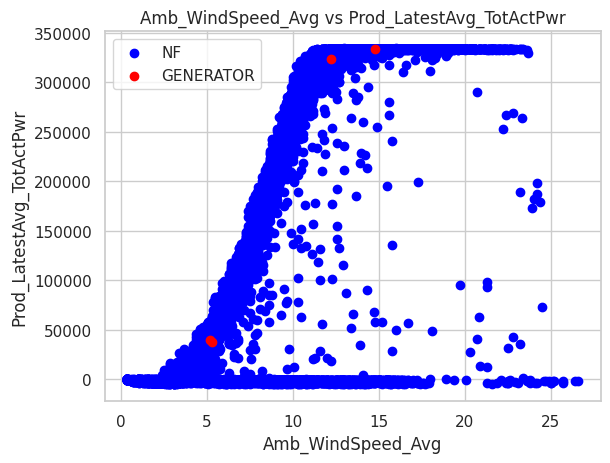

In [249]:
# prompt: df için Amb_WindSpeed_Max ile Prod_LatestAvg_TotActPwr grafiğini çiz, fault sütunu NF olanları mavi, HYDRAULIC_GROUP isimlileri kırmızı renkle göster

import matplotlib.pyplot as plt

# Filter the data based on the fault column
nf_data = df[df['fault'] == 'NF']
hydraulic_data = df[df['fault'] == 'GENERATOR']

# Plot the data points
plt.scatter(nf_data['Amb_WindSpeed_Avg'], nf_data['Prod_LatestAvg_TotActPwr'], color='blue', label='NF')
plt.scatter(hydraulic_data['Amb_WindSpeed_Avg'], hydraulic_data['Prod_LatestAvg_TotActPwr'], color='red', label='GENERATOR')

# Add labels and title
plt.xlabel('Amb_WindSpeed_Avg')
plt.ylabel('Prod_LatestAvg_TotActPwr')
plt.title('Amb_WindSpeed_Avg vs Prod_LatestAvg_TotActPwr')

# Add legend and show plot
plt.legend()
plt.show()


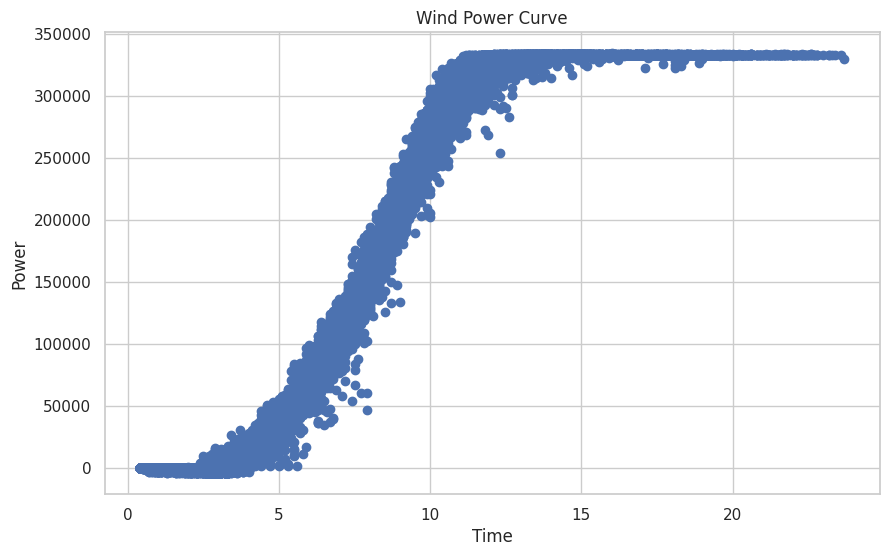

In [250]:
con0 = (nf_data['Amb_WindSpeed_Avg'] > 8) & (nf_data['Prod_LatestAvg_TotActPwr'] < 120000)
con7 = (nf_data['Amb_WindSpeed_Avg'] > 9) & (nf_data['Prod_LatestAvg_TotActPwr'] < 180000)

con1 = (nf_data['Amb_WindSpeed_Avg'] > 10) & (nf_data['Prod_LatestAvg_TotActPwr'] < 230000)
con10 = (nf_data['Amb_WindSpeed_Avg'] > 11) & (nf_data['Prod_LatestAvg_TotActPwr'] < 250000)

con2 = (nf_data['Amb_WindSpeed_Avg'] > 14) & (nf_data['Prod_LatestAvg_TotActPwr'] < 260000)

# İkinci koşul: Rüzgar hızı 8'den büyük ve güç 600'den düşükse


con3 = (nf_data['Amb_WindSpeed_Avg'] > 15) & (nf_data['Prod_LatestAvg_TotActPwr'] < 320000)
con4 = (nf_data['Amb_WindSpeed_Avg'] > 13) & (nf_data['Prod_LatestAvg_TotActPwr'] < 310000)

con5 = (nf_data['Amb_WindSpeed_Avg'] > 7) & (nf_data['Prod_LatestAvg_TotActPwr'] < 45000)
con8 = (nf_data['Amb_WindSpeed_Avg'] > 4) & (nf_data['Prod_LatestAvg_TotActPwr'] < 1000)
con9 = (nf_data['Amb_WindSpeed_Avg'] > 6) & (nf_data['Prod_LatestAvg_TotActPwr'] < 30000)

con6 = (nf_data['Amb_WindSpeed_Avg'] > 25) & (nf_data['Prod_LatestAvg_TotActPwr'] > 300000)

# İki koşulu birleştirip uygun olan satırları seçelim
mask = con0 | con1| con2| con3| con4| con5| con6| con7| con8| con9| con10

# Maskeye uyan satırları DataFrame'den çıkaralım
dfson = nf_data[~mask]

plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.plot(dfson['Amb_WindSpeed_Avg'], dfson['Prod_LatestAvg_TotActPwr'],'o')  # Adjust column names as needed
plt.xlabel('Time')
plt.ylabel('Power')
plt.title('Wind Power Curve')
plt.grid(True)


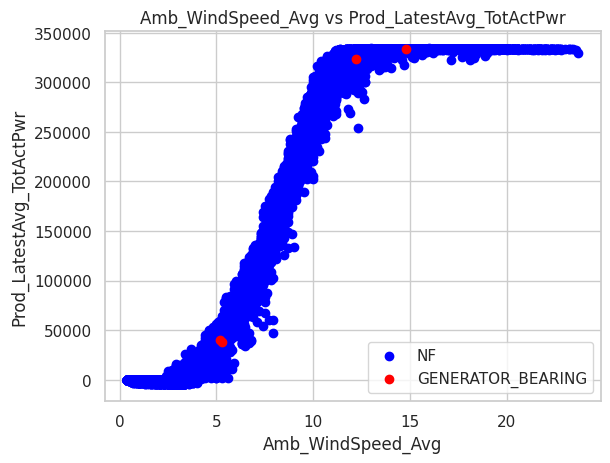

In [251]:
# Plot the data points
plt.scatter(dfson['Amb_WindSpeed_Avg'], dfson['Prod_LatestAvg_TotActPwr'], color='blue', label='NF')
plt.scatter(hydraulic_data['Amb_WindSpeed_Avg'], hydraulic_data['Prod_LatestAvg_TotActPwr'], color='red', label='GENERATOR_BEARING')

# Add labels and title
plt.xlabel('Amb_WindSpeed_Avg')
plt.ylabel('Prod_LatestAvg_TotActPwr')
plt.title('Amb_WindSpeed_Avg vs Prod_LatestAvg_TotActPwr')

# Add legend and show plot
plt.legend()
plt.show()

In [252]:
dfson

,Timestamp,Gen_RPM_Max,Gen_RPM_Min,Gen_RPM_Avg,Gen_RPM_Std,Gen_Bear_Temp_Avg,Gen_Phase1_Temp_Avg,Gen_Phase2_Temp_Avg,Gen_Phase3_Temp_Avg,Hyd_Oil_Temp_Avg,...,Grd_Prod_PsbleInd_Max,Grd_Prod_PsbleInd_Min,Grd_Prod_PsbleInd_Std,Grd_Prod_PsbleCap_Avg,Grd_Prod_PsbleCap_Max,Grd_Prod_PsbleCap_Min,Grd_Prod_PsbleCap_Std,Gen_Bear2_Temp_Avg,Nac_Direction_Avg,fault
0,2017-12-29 20:30:00+00:00,1344.0,265.3,647.1,476.4,43.0,56,57,57,29,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39,277.4,NF
1,2017-12-29 20:40:00+00:00,311.0,275.0,293.1,8.9,43.0,53,54,53,29,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,38,281.2,NF
2,2017-12-29 21:10:00+00:00,1433.2,266.5,475.6,383.1,40.0,48,49,49,30,...,0.0,-594.7,154.7,60.7,594.7,0.0,154.7,36,314.6,NF
3,2017-12-29 21:20:00+00:00,1272.4,988.6,1222.7,65.1,38.0,48,49,49,30,...,0.0,-423.5,142.7,147.4,423.5,0.0,142.7,36,317.1,NF
4,2017-12-29 21:50:00+00:00,1268.4,1051.9,1200.5,65.3,36.0,46,47,47,30,...,0.0,-776.3,240.3,156.3,776.3,0.0,240.3,35,315.4,NF
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102916,2016-10-22 08:30:00+00:00,1555.7,1216.7,1295.6,57.7,47.0,60,60,57,33,...,-250.9,-1000.0,181.0,920.2,1000.0,250.9,181.0,41,161.8,NF
102917,2016-10-22 09:10:00+00:00,1588.2,1200.3,1291.7,83.4,47.0,59,60,57,33,...,0.0,-1000.0,357.9,601.2,1000.0,0.0,357.9,41,174.1,NF
102918,2016-10-22 09:30:00+00:00,1498.5,1214.4,1285.1,64.8,47.0,59,60,57,33,...,0.0,-1000.0,304.5,699.9,1000.0,0.0,304.5,41,167.8,NF
102919,2016-10-22 10:40:00+00:00,1555.5,1194.1,1301.3,75.6,48.0,60,61,58,34,...,-143.3,-1000.0,168.7,891.2,1000.0,143.3,168.7,41,174.4,NF


In [253]:
# prompt: hydraulic_data ile dfson birleştir

dff= pd.merge(hydraulic_data, dfson, how='outer')


In [254]:
dff

,Timestamp,Gen_RPM_Max,Gen_RPM_Min,Gen_RPM_Avg,Gen_RPM_Std,Gen_Bear_Temp_Avg,Gen_Phase1_Temp_Avg,Gen_Phase2_Temp_Avg,Gen_Phase3_Temp_Avg,Hyd_Oil_Temp_Avg,...,Grd_Prod_PsbleInd_Max,Grd_Prod_PsbleInd_Min,Grd_Prod_PsbleInd_Std,Grd_Prod_PsbleCap_Avg,Grd_Prod_PsbleCap_Max,Grd_Prod_PsbleCap_Min,Grd_Prod_PsbleCap_Std,Gen_Bear2_Temp_Avg,Nac_Direction_Avg,fault
0,2016-09-04 08:00:00+00:00,1428.8,1240.8,1272.1,37.3,56.0,71,85,67,42,...,-800.1,-1000.0,41.0,978.9,1000.0,800.1,41.0,53,115.2,GENERATOR
1,2016-07-24 17:00:00+00:00,1805.2,1591.1,1681.1,27.6,94.0,122,125,111,44,...,-583.3,-1000.0,23.9,407.3,771.3,406.1,16.0,71,100.8,GENERATOR
2,2016-10-02 17:00:00+00:00,1467.7,1221.6,1279.4,38.9,47.0,55,88,53,36,...,-12.2,-1000.0,189.5,925.5,1000.0,12.2,189.5,44,256.5,GENERATOR
3,2016-10-27 16:20:00+00:00,1796.3,1577.8,1677.8,31.0,88.0,130,133,117,42,...,-583.3,-1000.0,152.5,469.1,1000.0,406.1,137.4,69,93.1,GENERATOR
4,2017-12-29 20:30:00+00:00,1344.0,265.3,647.1,476.4,43.0,56,57,57,29,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39,277.4,NF
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100868,2016-10-22 08:30:00+00:00,1555.7,1216.7,1295.6,57.7,47.0,60,60,57,33,...,-250.9,-1000.0,181.0,920.2,1000.0,250.9,181.0,41,161.8,NF
100869,2016-10-22 09:10:00+00:00,1588.2,1200.3,1291.7,83.4,47.0,59,60,57,33,...,0.0,-1000.0,357.9,601.2,1000.0,0.0,357.9,41,174.1,NF
100870,2016-10-22 09:30:00+00:00,1498.5,1214.4,1285.1,64.8,47.0,59,60,57,33,...,0.0,-1000.0,304.5,699.9,1000.0,0.0,304.5,41,167.8,NF
100871,2016-10-22 10:40:00+00:00,1555.5,1194.1,1301.3,75.6,48.0,60,61,58,34,...,-143.3,-1000.0,168.7,891.2,1000.0,143.3,168.7,41,174.4,NF


In [255]:
dff[dff['fault'] !='NF']

,Timestamp,Gen_RPM_Max,Gen_RPM_Min,Gen_RPM_Avg,Gen_RPM_Std,Gen_Bear_Temp_Avg,Gen_Phase1_Temp_Avg,Gen_Phase2_Temp_Avg,Gen_Phase3_Temp_Avg,Hyd_Oil_Temp_Avg,...,Grd_Prod_PsbleInd_Max,Grd_Prod_PsbleInd_Min,Grd_Prod_PsbleInd_Std,Grd_Prod_PsbleCap_Avg,Grd_Prod_PsbleCap_Max,Grd_Prod_PsbleCap_Min,Grd_Prod_PsbleCap_Std,Gen_Bear2_Temp_Avg,Nac_Direction_Avg,fault
0,2016-09-04 08:00:00+00:00,1428.8,1240.8,1272.1,37.3,56.0,71,85,67,42,...,-800.1,-1000.0,41.0,978.9,1000.0,800.1,41.0,53,115.2,GENERATOR
1,2016-07-24 17:00:00+00:00,1805.2,1591.1,1681.1,27.6,94.0,122,125,111,44,...,-583.3,-1000.0,23.9,407.3,771.3,406.1,16.0,71,100.8,GENERATOR
2,2016-10-02 17:00:00+00:00,1467.7,1221.6,1279.4,38.9,47.0,55,88,53,36,...,-12.2,-1000.0,189.5,925.5,1000.0,12.2,189.5,44,256.5,GENERATOR
3,2016-10-27 16:20:00+00:00,1796.3,1577.8,1677.8,31.0,88.0,130,133,117,42,...,-583.3,-1000.0,152.5,469.1,1000.0,406.1,137.4,69,93.1,GENERATOR


In [256]:
perc=0.4  # test oranı orn:0.3 ise %70 train %30 testtir
fau='GENERATOR'    # arıza türleridir 'GF' 'AF' 'MF' 'FF' 'EF'
fau

'GENERATOR'

In [257]:
data = dff[dff['fault'].isin([fau,'NF'])]

In [258]:
# prompt: 2016-04-30 tarihindeki verilerden ['Gen_Bear_Temp_Avg'] ve dff['Gen_Bear2_Temp_Avg'] sütun değerlerini göster

data2016 = data[data['Timestamp'] <= '2016-04-30 12:40:00+00:00'].sort_values(by='Timestamp', ascending=True)
datafilter = data2016[data2016['Timestamp'] >= '2016-04-28 00:00:00+00:00'].sort_values(by='Timestamp', ascending=True)
datafilter[['Gen_Bear_Temp_Avg', 'Gen_Bear2_Temp_Avg']]


,Gen_Bear_Temp_Avg,Gen_Bear2_Temp_Avg
64994,33.0,28
64995,32.0,28
78541,31.0,28
79538,31.0,28
76218,30.0,27
...,...,...
78532,40.0,35
78533,40.0,35
85485,39.0,34
85486,39.0,34


In [259]:
data[data.fault!='NF']

,Timestamp,Gen_RPM_Max,Gen_RPM_Min,Gen_RPM_Avg,Gen_RPM_Std,Gen_Bear_Temp_Avg,Gen_Phase1_Temp_Avg,Gen_Phase2_Temp_Avg,Gen_Phase3_Temp_Avg,Hyd_Oil_Temp_Avg,...,Grd_Prod_PsbleInd_Max,Grd_Prod_PsbleInd_Min,Grd_Prod_PsbleInd_Std,Grd_Prod_PsbleCap_Avg,Grd_Prod_PsbleCap_Max,Grd_Prod_PsbleCap_Min,Grd_Prod_PsbleCap_Std,Gen_Bear2_Temp_Avg,Nac_Direction_Avg,fault
0,2016-09-04 08:00:00+00:00,1428.8,1240.8,1272.1,37.3,56.0,71,85,67,42,...,-800.1,-1000.0,41.0,978.9,1000.0,800.1,41.0,53,115.2,GENERATOR
1,2016-07-24 17:00:00+00:00,1805.2,1591.1,1681.1,27.6,94.0,122,125,111,44,...,-583.3,-1000.0,23.9,407.3,771.3,406.1,16.0,71,100.8,GENERATOR
2,2016-10-02 17:00:00+00:00,1467.7,1221.6,1279.4,38.9,47.0,55,88,53,36,...,-12.2,-1000.0,189.5,925.5,1000.0,12.2,189.5,44,256.5,GENERATOR
3,2016-10-27 16:20:00+00:00,1796.3,1577.8,1677.8,31.0,88.0,130,133,117,42,...,-583.3,-1000.0,152.5,469.1,1000.0,406.1,137.4,69,93.1,GENERATOR


In [260]:
datan=data.drop(columns=['fault'])
datan

,Timestamp,Gen_RPM_Max,Gen_RPM_Min,Gen_RPM_Avg,Gen_RPM_Std,Gen_Bear_Temp_Avg,Gen_Phase1_Temp_Avg,Gen_Phase2_Temp_Avg,Gen_Phase3_Temp_Avg,Hyd_Oil_Temp_Avg,...,Grd_Prod_PsbleInd_Avg,Grd_Prod_PsbleInd_Max,Grd_Prod_PsbleInd_Min,Grd_Prod_PsbleInd_Std,Grd_Prod_PsbleCap_Avg,Grd_Prod_PsbleCap_Max,Grd_Prod_PsbleCap_Min,Grd_Prod_PsbleCap_Std,Gen_Bear2_Temp_Avg,Nac_Direction_Avg
0,2016-09-04 08:00:00+00:00,1428.8,1240.8,1272.1,37.3,56.0,71,85,67,42,...,-978.9,-800.1,-1000.0,41.0,978.9,1000.0,800.1,41.0,53,115.2
1,2016-07-24 17:00:00+00:00,1805.2,1591.1,1681.1,27.6,94.0,122,125,111,44,...,-585.3,-583.3,-1000.0,23.9,407.3,771.3,406.1,16.0,71,100.8
2,2016-10-02 17:00:00+00:00,1467.7,1221.6,1279.4,38.9,47.0,55,88,53,36,...,-925.5,-12.2,-1000.0,189.5,925.5,1000.0,12.2,189.5,44,256.5
3,2016-10-27 16:20:00+00:00,1796.3,1577.8,1677.8,31.0,88.0,130,133,117,42,...,-664.0,-583.3,-1000.0,152.5,469.1,1000.0,406.1,137.4,69,93.1
4,2017-12-29 20:30:00+00:00,1344.0,265.3,647.1,476.4,43.0,56,57,57,29,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39,277.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100868,2016-10-22 08:30:00+00:00,1555.7,1216.7,1295.6,57.7,47.0,60,60,57,33,...,-920.2,-250.9,-1000.0,181.0,920.2,1000.0,250.9,181.0,41,161.8
100869,2016-10-22 09:10:00+00:00,1588.2,1200.3,1291.7,83.4,47.0,59,60,57,33,...,-601.2,0.0,-1000.0,357.9,601.2,1000.0,0.0,357.9,41,174.1
100870,2016-10-22 09:30:00+00:00,1498.5,1214.4,1285.1,64.8,47.0,59,60,57,33,...,-699.9,0.0,-1000.0,304.5,699.9,1000.0,0.0,304.5,41,167.8
100871,2016-10-22 10:40:00+00:00,1555.5,1194.1,1301.3,75.6,48.0,60,61,58,34,...,-891.2,-143.3,-1000.0,168.7,891.2,1000.0,143.3,168.7,41,174.4


In [263]:
# prompt:  Gen_Bear_Temp_Avg ile korelasyonu 0.5 değerinden yüksek sütunları belirle

import pandas as pd

# Calculate the correlation matrix
corr_matrix = datan.corr()

# Select the columns that have a correlation greater than 0.5 with 'Gen_Bear_Temp_Avg'
corr_columns = corr_matrix['Gen_RPM_Max'].loc[lambda x: x > 0.8].index.tolist()

# Print the selected columns
corr_columns



['Gen_RPM_Max',
 'Gen_RPM_Min',
 'Gen_RPM_Avg',
 'Gear_Bear_Temp_Avg',
 'Rtr_RPM_Max',
 'Rtr_RPM_Min',
 'Rtr_RPM_Avg',
 'Cont_VCP_ChokcoilTemp_Avg',
 'Grd_Prod_PsbleCap_Max']

In [264]:
data_hy=data

#data_hy = data_hy.drop(data_hy[(data_hy['WEC: max. Power'] == 0) & (data_hy.iloc[:, -1] == 'NF')].index)
data_nf = data_hy[data_hy.fault == 'NF'].sample(2000, random_state = 123)

df_f = data_hy[data_hy.fault!='NF']

df_combine = pd.concat((data_nf, df_f), axis=0).reset_index(drop=True)

df_combine
data_hy=df_combine

In [265]:
df_f

,Timestamp,Gen_RPM_Max,Gen_RPM_Min,Gen_RPM_Avg,Gen_RPM_Std,Gen_Bear_Temp_Avg,Gen_Phase1_Temp_Avg,Gen_Phase2_Temp_Avg,Gen_Phase3_Temp_Avg,Hyd_Oil_Temp_Avg,...,Grd_Prod_PsbleInd_Max,Grd_Prod_PsbleInd_Min,Grd_Prod_PsbleInd_Std,Grd_Prod_PsbleCap_Avg,Grd_Prod_PsbleCap_Max,Grd_Prod_PsbleCap_Min,Grd_Prod_PsbleCap_Std,Gen_Bear2_Temp_Avg,Nac_Direction_Avg,fault
0,2016-09-04 08:00:00+00:00,1428.8,1240.8,1272.1,37.3,56.0,71,85,67,42,...,-800.1,-1000.0,41.0,978.9,1000.0,800.1,41.0,53,115.2,GENERATOR
1,2016-07-24 17:00:00+00:00,1805.2,1591.1,1681.1,27.6,94.0,122,125,111,44,...,-583.3,-1000.0,23.9,407.3,771.3,406.1,16.0,71,100.8,GENERATOR
2,2016-10-02 17:00:00+00:00,1467.7,1221.6,1279.4,38.9,47.0,55,88,53,36,...,-12.2,-1000.0,189.5,925.5,1000.0,12.2,189.5,44,256.5,GENERATOR
3,2016-10-27 16:20:00+00:00,1796.3,1577.8,1677.8,31.0,88.0,130,133,117,42,...,-583.3,-1000.0,152.5,469.1,1000.0,406.1,137.4,69,93.1,GENERATOR


In [266]:
data_hy=data_hy.set_index('Timestamp')

In [267]:
data_hy

,Gen_RPM_Max,Gen_RPM_Min,Gen_RPM_Avg,Gen_RPM_Std,Gen_Bear_Temp_Avg,Gen_Phase1_Temp_Avg,Gen_Phase2_Temp_Avg,Gen_Phase3_Temp_Avg,Hyd_Oil_Temp_Avg,Gear_Oil_Temp_Avg,...,Grd_Prod_PsbleInd_Max,Grd_Prod_PsbleInd_Min,Grd_Prod_PsbleInd_Std,Grd_Prod_PsbleCap_Avg,Grd_Prod_PsbleCap_Max,Grd_Prod_PsbleCap_Min,Grd_Prod_PsbleCap_Std,Gen_Bear2_Temp_Avg,Nac_Direction_Avg,fault
Timestamp,,,,,,,,,,,,,,,,,,,,,
2017-05-19 10:50:00+00:00,296.6,122.3,199.8,52.5,27.0,30,30,30,33,38,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,28,19.5,NF
2016-06-17 23:20:00+00:00,1395.4,1235.9,1274.8,34.2,44.0,54,55,55,35,49,...,-815.9,-1000.0,33.6,987.2,1000.0,815.9,33.6,36,320.2,NF
2017-12-17 10:40:00+00:00,268.9,178.3,226.8,24.6,27.0,32,32,33,26,40,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,27,61.9,NF
2016-11-08 06:20:00+00:00,231.0,159.0,197.7,16.2,25.0,31,31,32,27,40,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,26,332.9,NF
2017-12-23 14:10:00+00:00,1266.5,1242.1,1250.1,3.2,54.0,40,41,41,30,43,...,0.0,-477.7,127.2,206.8,477.7,0.0,127.2,33,146.0,NF
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-10-06 15:20:00+00:00,1433.6,1209.0,1264.5,39.7,43.0,50,51,51,42,48,...,0.0,-1000.0,302.8,718.6,1000.0,0.0,302.8,44,243.5,NF
2016-09-04 08:00:00+00:00,1428.8,1240.8,1272.1,37.3,56.0,71,85,67,42,54,...,-800.1,-1000.0,41.0,978.9,1000.0,800.1,41.0,53,115.2,GENERATOR
2016-07-24 17:00:00+00:00,1805.2,1591.1,1681.1,27.6,94.0,122,125,111,44,58,...,-583.3,-1000.0,23.9,407.3,771.3,406.1,16.0,71,100.8,GENERATOR


In [268]:
# prompt: zaman endeksini sıraya koy

data_hy=data_hy.sort_index()


In [269]:
data_hy

,Gen_RPM_Max,Gen_RPM_Min,Gen_RPM_Avg,Gen_RPM_Std,Gen_Bear_Temp_Avg,Gen_Phase1_Temp_Avg,Gen_Phase2_Temp_Avg,Gen_Phase3_Temp_Avg,Hyd_Oil_Temp_Avg,Gear_Oil_Temp_Avg,...,Grd_Prod_PsbleInd_Max,Grd_Prod_PsbleInd_Min,Grd_Prod_PsbleInd_Std,Grd_Prod_PsbleCap_Avg,Grd_Prod_PsbleCap_Max,Grd_Prod_PsbleCap_Min,Grd_Prod_PsbleCap_Std,Gen_Bear2_Temp_Avg,Nac_Direction_Avg,fault
Timestamp,,,,,,,,,,,,,,,,,,,,,
2016-01-01 12:30:00+00:00,1670.2,1273.5,1432.8,96.0,43.0,53,54,55,31,46,...,-946.9,-1000.0,1.1,1000.0,1000.0,946.9,1.1,35,228.4,NF
2016-01-01 12:50:00+00:00,1659.8,1244.4,1517.9,127.5,46.0,56,57,58,31,48,...,-1000.0,-1000.0,0.0,1000.0,1000.0,1000.0,0.0,36,222.1,NF
2016-01-02 04:40:00+00:00,1693.2,1367.8,1576.0,71.4,47.0,59,59,60,35,52,...,-583.3,-1000.0,49.8,964.1,1000.0,406.1,113.3,36,229.9,NF
2016-01-03 03:50:00+00:00,82.3,26.7,54.2,17.0,24.0,29,29,28,29,33,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24,336.4,NF
2016-01-03 05:20:00+00:00,168.0,70.1,91.1,21.9,23.0,27,27,27,29,33,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24,336.4,NF
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-29 14:10:00+00:00,1332.7,1238.9,1257.3,19.8,45.0,59,60,60,30,47,...,-385.9,-1000.0,138.1,935.5,1000.0,385.9,138.1,41,294.1,NF
2017-12-29 20:10:00+00:00,1255.8,1242.8,1249.8,1.7,43.0,58,60,60,30,45,...,-68.6,-551.0,114.6,297.7,551.0,68.6,114.6,39,297.8,NF
2017-12-29 23:20:00+00:00,1255.3,1244.4,1249.5,1.1,38.0,52,53,53,29,44,...,-367.3,-1000.0,201.0,729.9,1000.0,367.3,201.0,36,315.4,NF


In [270]:
data_af=data_hy

In [271]:
data_afx= data_af.drop(columns=['fault'])
data_afx

,Gen_RPM_Max,Gen_RPM_Min,Gen_RPM_Avg,Gen_RPM_Std,Gen_Bear_Temp_Avg,Gen_Phase1_Temp_Avg,Gen_Phase2_Temp_Avg,Gen_Phase3_Temp_Avg,Hyd_Oil_Temp_Avg,Gear_Oil_Temp_Avg,...,Grd_Prod_PsbleInd_Avg,Grd_Prod_PsbleInd_Max,Grd_Prod_PsbleInd_Min,Grd_Prod_PsbleInd_Std,Grd_Prod_PsbleCap_Avg,Grd_Prod_PsbleCap_Max,Grd_Prod_PsbleCap_Min,Grd_Prod_PsbleCap_Std,Gen_Bear2_Temp_Avg,Nac_Direction_Avg
Timestamp,,,,,,,,,,,,,,,,,,,,,
2016-01-01 12:30:00+00:00,1670.2,1273.5,1432.8,96.0,43.0,53,54,55,31,46,...,-1000.0,-946.9,-1000.0,1.1,1000.0,1000.0,946.9,1.1,35,228.4
2016-01-01 12:50:00+00:00,1659.8,1244.4,1517.9,127.5,46.0,56,57,58,31,48,...,-1000.0,-1000.0,-1000.0,0.0,1000.0,1000.0,1000.0,0.0,36,222.1
2016-01-02 04:40:00+00:00,1693.2,1367.8,1576.0,71.4,47.0,59,59,60,35,52,...,-991.4,-583.3,-1000.0,49.8,964.1,1000.0,406.1,113.3,36,229.9
2016-01-03 03:50:00+00:00,82.3,26.7,54.2,17.0,24.0,29,29,28,29,33,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24,336.4
2016-01-03 05:20:00+00:00,168.0,70.1,91.1,21.9,23.0,27,27,27,29,33,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24,336.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-29 14:10:00+00:00,1332.7,1238.9,1257.3,19.8,45.0,59,60,60,30,47,...,-935.5,-385.9,-1000.0,138.1,935.5,1000.0,385.9,138.1,41,294.1
2017-12-29 20:10:00+00:00,1255.8,1242.8,1249.8,1.7,43.0,58,60,60,30,45,...,-297.7,-68.6,-551.0,114.6,297.7,551.0,68.6,114.6,39,297.8
2017-12-29 23:20:00+00:00,1255.3,1244.4,1249.5,1.1,38.0,52,53,53,29,44,...,-729.9,-367.3,-1000.0,201.0,729.9,1000.0,367.3,201.0,36,315.4


In [272]:
hdata=data_af['fault'].replace('NF', 0, inplace=True)
hdata=data_af['fault'].replace(fau, 1, inplace=True)

In [273]:
data_afx= data_af.drop(columns=['fault'])
data_afy=data_af['fault']

In [274]:
data_afy

Timestamp
2016-01-01 12:30:00+00:00    0
2016-01-01 12:50:00+00:00    0
2016-01-02 04:40:00+00:00    0
2016-01-03 03:50:00+00:00    0
2016-01-03 05:20:00+00:00    0
                            ..
2017-12-29 14:10:00+00:00    0
2017-12-29 20:10:00+00:00    0
2017-12-29 23:20:00+00:00    0
2017-12-31 15:10:00+00:00    0
2017-12-31 19:20:00+00:00    0
Name: fault, Length: 2004, dtype: int64

In [275]:
scaler1 = preprocessing.MinMaxScaler()

x_new = pd.DataFrame(scaler1.fit_transform(data_afx),
                              columns = data_afx.columns,
                              index = data_afx.index)

[LightGBM] [Info] Number of positive: 4, number of negative: 2000
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000394 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1423
[LightGBM] [Info] Number of data points in the train set: 2004, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.001996 -> initscore=-6.214608
[LightGBM] [Info] Start training from score -6.214608
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

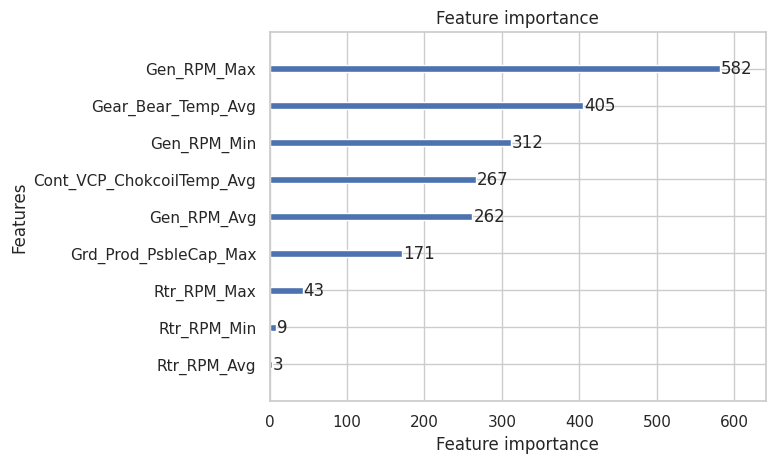

In [366]:
# prompt: Light GBM ye göre faulta göre feature importance göster, yüksek değere sahip sütunları belirle

import lightgbm as lgb
model_lgb = lgb.LGBMClassifier(random_state=42)
model_lgb.fit(x_new, data_afy)
lgb.plot_importance(model_lgb, max_num_features=10)
plt.show()


In [367]:
features

Index(['Gen_RPM_Max', 'Gen_RPM_Min', 'Gen_RPM_Avg', 'Gear_Bear_Temp_Avg',
       'Rtr_RPM_Max', 'Rtr_RPM_Min', 'Rtr_RPM_Avg',
       'Cont_VCP_ChokcoilTemp_Avg', 'Grd_Prod_PsbleCap_Max', 'fault'],
      dtype='object')

In [368]:
x_new = x_new[features]
x_new

,Gen_RPM_Max,Gen_RPM_Min,Gen_RPM_Avg,Gear_Bear_Temp_Avg,Rtr_RPM_Max,Rtr_RPM_Min,Rtr_RPM_Avg,Cont_VCP_ChokcoilTemp_Avg,Grd_Prod_PsbleCap_Max,fault
Timestamp,,,,,,,,,,
2016-01-01 12:30:00+00:00,0.902226,0.767122,0.851489,0.652174,0.902439,0.768707,0.852349,0.611570,1.000,0
2016-01-01 12:50:00+00:00,0.896608,0.749593,0.902062,0.695652,0.896341,0.748299,0.899329,0.628099,1.000,0
2016-01-02 04:40:00+00:00,0.914650,0.823926,0.936590,0.739130,0.914634,0.823129,0.939597,0.694215,1.000,0
2016-01-03 03:50:00+00:00,0.044458,0.016083,0.032210,0.195652,0.000000,0.000000,0.000000,0.041322,0.000,0
2016-01-03 05:20:00+00:00,0.090752,0.042226,0.054139,0.173913,0.091463,0.000000,0.000000,0.033058,0.000,0
...,...,...,...,...,...,...,...,...,...,...
2017-12-29 14:10:00+00:00,0.719911,0.746280,0.747192,0.652174,0.719512,0.748299,0.744966,0.661157,1.000,0
2017-12-29 20:10:00+00:00,0.678371,0.748630,0.742735,0.565217,0.676829,0.748299,0.744966,0.661157,0.551,0
2017-12-29 23:20:00+00:00,0.678101,0.749593,0.742557,0.565217,0.676829,0.748299,0.744966,0.661157,1.000,0


In [191]:
#x_new = x_new[['Gen_Bear_Temp_Avg','Gen_RPM_Avg','Gen_Bear2_Temp_Avg','Rtr_RPM_Avg','Gen_Phase1_Temp_Avg',
 #'Gen_Phase2_Temp_Avg',
 #'Gen_Phase3_Temp_Avg','Amb_WindSpeed_Avg','Prod_LatestAvg_TotActPwr']]

In [192]:
#x_new = pd.DataFrame(scaler1.fit_transform(data_afx),
 #                             columns = data_afx.columns,
   #                           index = data_afx.index)

In [193]:
# prompt: 'Gen_RPM_Avg','Gen_Bear_Temp_Avg','Hyd_Oil_Temp_Avg','Gear_Oil_Temp_Avg','Gear_Bear_Temp_Avg','Nac_Temp_Avg','Rtr_RPM_Avg','Amb_WindSpeed_Avg' sütunlarını seç ve x_new oluştur

# x_new = x_new[['Gen_RPM_Avg','Gen_Bear_Temp_Avg','Hyd_Oil_Temp_Avg','Gear_Oil_Temp_Avg','Gear_Bear_Temp_Avg','Nac_Temp_Avg','Rtr_RPM_Avg','Amb_WindSpeed_Avg']]


In [369]:
x_new['fault']=data_af['fault']

In [371]:
x_new

,Gen_RPM_Max,Gen_RPM_Min,Gen_RPM_Avg,Gear_Bear_Temp_Avg,Rtr_RPM_Max,Rtr_RPM_Min,Rtr_RPM_Avg,Cont_VCP_ChokcoilTemp_Avg,Grd_Prod_PsbleCap_Max,fault
Timestamp,,,,,,,,,,
2016-01-01 12:30:00+00:00,0.902226,0.767122,0.851489,0.652174,0.902439,0.768707,0.852349,0.611570,1.000,0
2016-01-01 12:50:00+00:00,0.896608,0.749593,0.902062,0.695652,0.896341,0.748299,0.899329,0.628099,1.000,0
2016-01-02 04:40:00+00:00,0.914650,0.823926,0.936590,0.739130,0.914634,0.823129,0.939597,0.694215,1.000,0
2016-01-03 03:50:00+00:00,0.044458,0.016083,0.032210,0.195652,0.000000,0.000000,0.000000,0.041322,0.000,0
2016-01-03 05:20:00+00:00,0.090752,0.042226,0.054139,0.173913,0.091463,0.000000,0.000000,0.033058,0.000,0
...,...,...,...,...,...,...,...,...,...,...
2017-12-29 14:10:00+00:00,0.719911,0.746280,0.747192,0.652174,0.719512,0.748299,0.744966,0.661157,1.000,0
2017-12-29 20:10:00+00:00,0.678371,0.748630,0.742735,0.565217,0.676829,0.748299,0.744966,0.661157,0.551,0
2017-12-29 23:20:00+00:00,0.678101,0.749593,0.742557,0.565217,0.676829,0.748299,0.744966,0.661157,1.000,0


In [372]:
data_af=x_new

In [373]:
corr_matrixx = data_af.corr()
corr_matrixx['fault'].sort_values(ascending=False)

fault                        1.000000
Gear_Bear_Temp_Avg           0.038992
Cont_VCP_ChokcoilTemp_Avg    0.038887
Rtr_RPM_Min                  0.033658
Gen_RPM_Min                  0.033570
Gen_RPM_Max                  0.030552
Rtr_RPM_Max                  0.030296
Rtr_RPM_Avg                  0.029793
Gen_RPM_Avg                  0.029750
Grd_Prod_PsbleCap_Max        0.029141
Name: fault, dtype: float64

In [374]:
corr_matrixx = data_af.corr()
corr_matrixx

,Gen_RPM_Max,Gen_RPM_Min,Gen_RPM_Avg,Gear_Bear_Temp_Avg,Rtr_RPM_Max,Rtr_RPM_Min,Rtr_RPM_Avg,Cont_VCP_ChokcoilTemp_Avg,Grd_Prod_PsbleCap_Max,fault
Gen_RPM_Max,1.000000,0.882641,0.967581,0.892272,0.999230,0.881609,0.967779,0.872241,0.892050,0.030552
Gen_RPM_Min,0.882641,1.000000,0.957661,0.898234,0.881484,0.998746,0.956621,0.888856,0.823522,0.033570
Gen_RPM_Avg,0.967581,0.957661,1.000000,0.923811,0.966582,0.956713,0.999363,0.903009,0.886949,0.029750
Gear_Bear_Temp_Avg,0.892272,0.898234,0.923811,1.000000,0.890107,0.896172,0.922192,0.953317,0.774374,0.038992
Rtr_RPM_Max,0.999230,0.881484,0.966582,0.890107,1.000000,0.880938,0.967776,0.871100,0.892289,0.030296
Rtr_RPM_Min,0.881609,0.998746,0.956713,0.896172,0.880938,1.000000,0.956663,0.887917,0.824486,0.033658
Rtr_RPM_Avg,0.967779,0.956621,0.999363,0.922192,0.967776,0.956663,1.000000,0.902630,0.887491,0.029793
Cont_VCP_ChokcoilTemp_Avg,0.872241,0.888856,0.903009,0.953317,0.871100,0.887917,0.902630,1.000000,0.762972,0.038887
Grd_Prod_PsbleCap_Max,0.892050,0.823522,0.886949,0.774374,0.892289,0.824486,0.887491,0.762972,1.000000,0.029141
fault,0.030552,0.033570,0.029750,0.038992,0.030296,0.033658,0.029793,0.038887,0.029141,1.000000


In [375]:
data_af

,Gen_RPM_Max,Gen_RPM_Min,Gen_RPM_Avg,Gear_Bear_Temp_Avg,Rtr_RPM_Max,Rtr_RPM_Min,Rtr_RPM_Avg,Cont_VCP_ChokcoilTemp_Avg,Grd_Prod_PsbleCap_Max,fault
Timestamp,,,,,,,,,,
2016-01-01 12:30:00+00:00,0.902226,0.767122,0.851489,0.652174,0.902439,0.768707,0.852349,0.611570,1.000,0
2016-01-01 12:50:00+00:00,0.896608,0.749593,0.902062,0.695652,0.896341,0.748299,0.899329,0.628099,1.000,0
2016-01-02 04:40:00+00:00,0.914650,0.823926,0.936590,0.739130,0.914634,0.823129,0.939597,0.694215,1.000,0
2016-01-03 03:50:00+00:00,0.044458,0.016083,0.032210,0.195652,0.000000,0.000000,0.000000,0.041322,0.000,0
2016-01-03 05:20:00+00:00,0.090752,0.042226,0.054139,0.173913,0.091463,0.000000,0.000000,0.033058,0.000,0
...,...,...,...,...,...,...,...,...,...,...
2017-12-29 14:10:00+00:00,0.719911,0.746280,0.747192,0.652174,0.719512,0.748299,0.744966,0.661157,1.000,0
2017-12-29 20:10:00+00:00,0.678371,0.748630,0.742735,0.565217,0.676829,0.748299,0.744966,0.661157,0.551,0
2017-12-29 23:20:00+00:00,0.678101,0.749593,0.742557,0.565217,0.676829,0.748299,0.744966,0.661157,1.000,0


In [376]:
# prompt: Timestamp tarih sırasına koy

data_af = data_af.sort_values(by='Timestamp', ascending=True)
data_af

,Gen_RPM_Max,Gen_RPM_Min,Gen_RPM_Avg,Gear_Bear_Temp_Avg,Rtr_RPM_Max,Rtr_RPM_Min,Rtr_RPM_Avg,Cont_VCP_ChokcoilTemp_Avg,Grd_Prod_PsbleCap_Max,fault
Timestamp,,,,,,,,,,
2016-01-01 12:30:00+00:00,0.902226,0.767122,0.851489,0.652174,0.902439,0.768707,0.852349,0.611570,1.000,0
2016-01-01 12:50:00+00:00,0.896608,0.749593,0.902062,0.695652,0.896341,0.748299,0.899329,0.628099,1.000,0
2016-01-02 04:40:00+00:00,0.914650,0.823926,0.936590,0.739130,0.914634,0.823129,0.939597,0.694215,1.000,0
2016-01-03 03:50:00+00:00,0.044458,0.016083,0.032210,0.195652,0.000000,0.000000,0.000000,0.041322,0.000,0
2016-01-03 05:20:00+00:00,0.090752,0.042226,0.054139,0.173913,0.091463,0.000000,0.000000,0.033058,0.000,0
...,...,...,...,...,...,...,...,...,...,...
2017-12-29 14:10:00+00:00,0.719911,0.746280,0.747192,0.652174,0.719512,0.748299,0.744966,0.661157,1.000,0
2017-12-29 20:10:00+00:00,0.678371,0.748630,0.742735,0.565217,0.676829,0.748299,0.744966,0.661157,0.551,0
2017-12-29 23:20:00+00:00,0.678101,0.749593,0.742557,0.565217,0.676829,0.748299,0.744966,0.661157,1.000,0


In [377]:
last_40percent = round(len(data_af) - len(data_af)*perc)
#trainhy = data_af.iloc[ :last_40percent, :]
#testhy= data_af.iloc[last_40percent: ,:]

trainhy = data_af.loc['2016-01':'2016-09']
testhy = data_af.loc['2016-10':'2017-12']

In [378]:
sutun=trainhy.shape[1]
sensor_cols = trainhy.iloc[:,0:sutun-1]
broken_rows = trainhy[trainhy['fault']==1]
normal_rows = trainhy[trainhy['fault']==0]
machine_status_col = trainhy['fault']

In [379]:
broken_rows00 = testhy[testhy['fault']==1]

In [380]:
sensor_cols = trainhy.iloc[:,0:sutun-1]


In [381]:
sensor_cols

,Gen_RPM_Max,Gen_RPM_Min,Gen_RPM_Avg,Gear_Bear_Temp_Avg,Rtr_RPM_Max,Rtr_RPM_Min,Rtr_RPM_Avg,Cont_VCP_ChokcoilTemp_Avg,Grd_Prod_PsbleCap_Max
Timestamp,,,,,,,,,
2016-01-01 12:30:00+00:00,0.902226,0.767122,0.851489,0.652174,0.902439,0.768707,0.852349,0.611570,1.0000
2016-01-01 12:50:00+00:00,0.896608,0.749593,0.902062,0.695652,0.896341,0.748299,0.899329,0.628099,1.0000
2016-01-02 04:40:00+00:00,0.914650,0.823926,0.936590,0.739130,0.914634,0.823129,0.939597,0.694215,1.0000
2016-01-03 03:50:00+00:00,0.044458,0.016083,0.032210,0.195652,0.000000,0.000000,0.000000,0.041322,0.0000
2016-01-03 05:20:00+00:00,0.090752,0.042226,0.054139,0.173913,0.091463,0.000000,0.000000,0.033058,0.0000
...,...,...,...,...,...,...,...,...,...
2016-09-28 01:00:00+00:00,0.916162,0.938377,0.976169,0.804348,0.914634,0.938776,0.973154,0.768595,1.0000
2016-09-29 17:50:00+00:00,0.991411,0.939221,0.999109,0.913043,0.981707,0.952381,1.000000,0.966942,0.4676
2016-09-29 20:10:00+00:00,0.954462,0.972893,0.998871,0.891304,0.951220,0.979592,1.000000,0.966942,0.6784


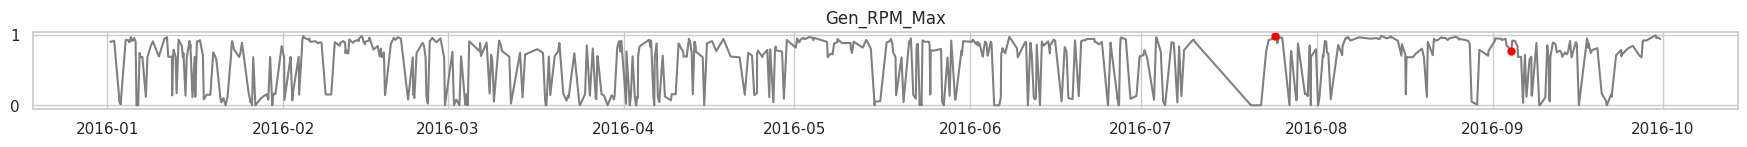

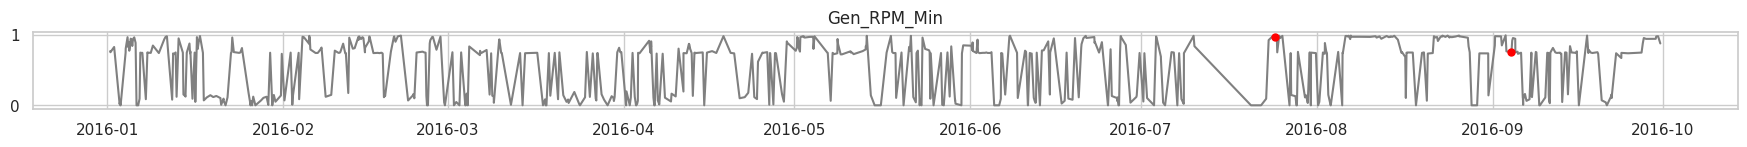

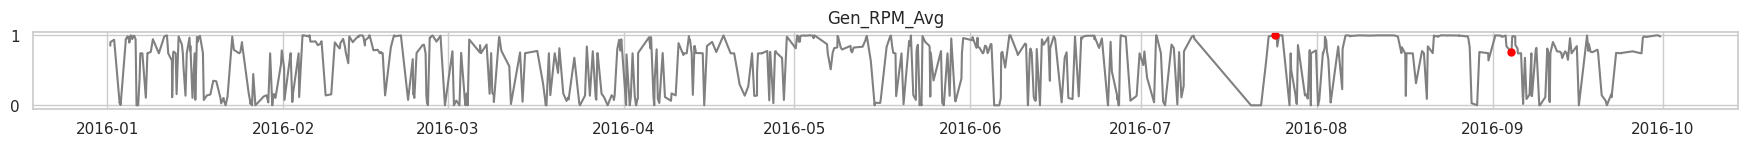

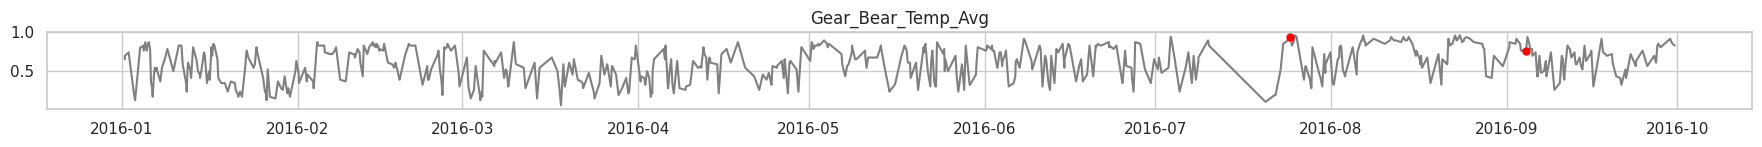

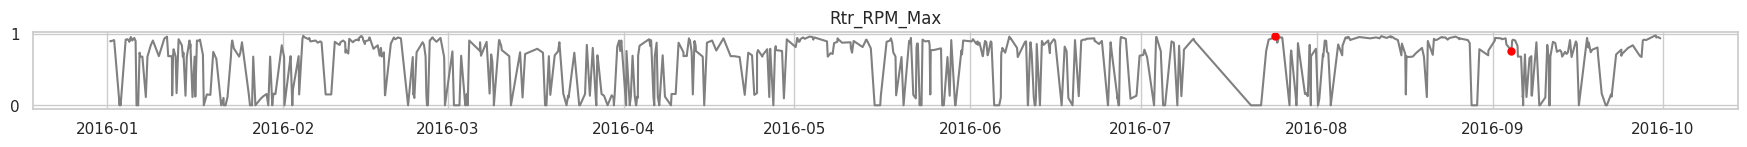

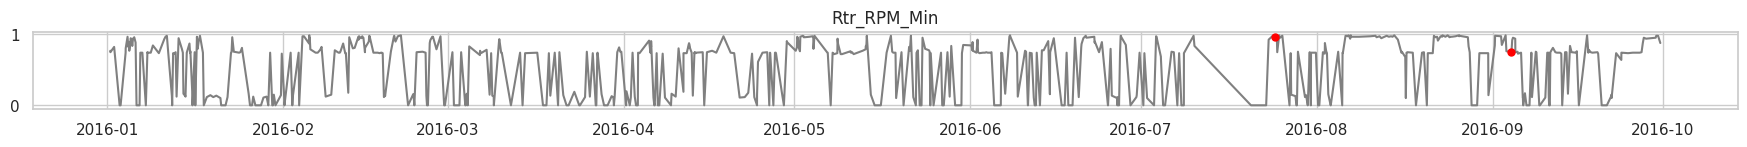

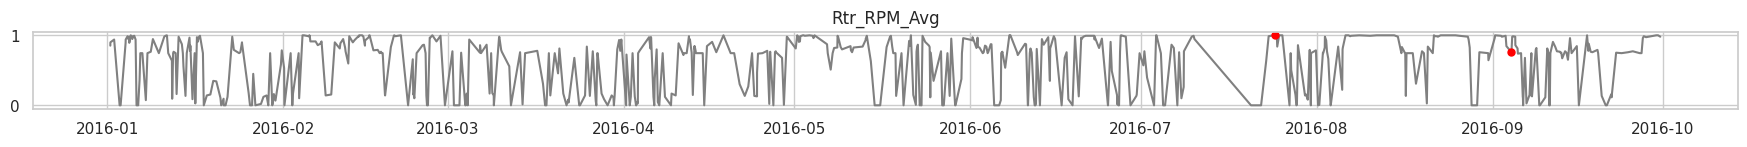

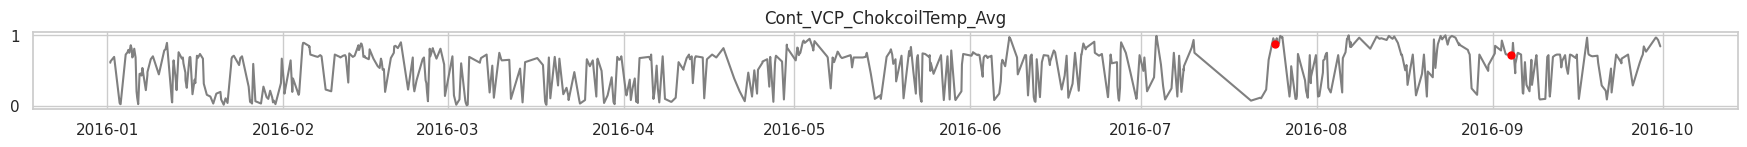

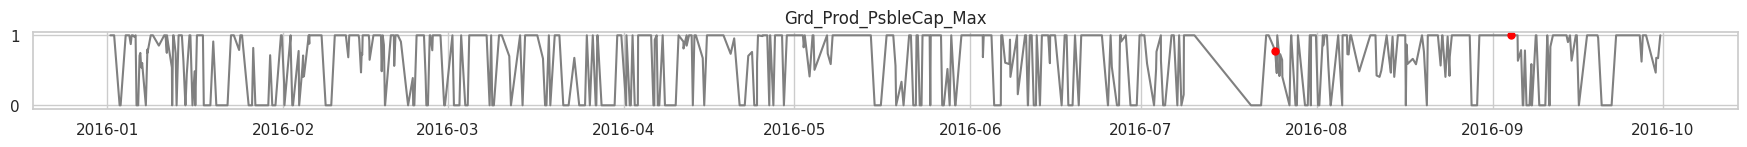

In [382]:
for sensor in sensor_cols:
    plot = plt.figure(figsize=(22,1))
    plot = plt.plot(trainhy[sensor], color='grey')
    plot = plt.plot(broken_rows[sensor], linestyle='none', marker='.', color='red', markersize=10)
    plot = plt.title(sensor)
    plt.xlim()

    plt.show()

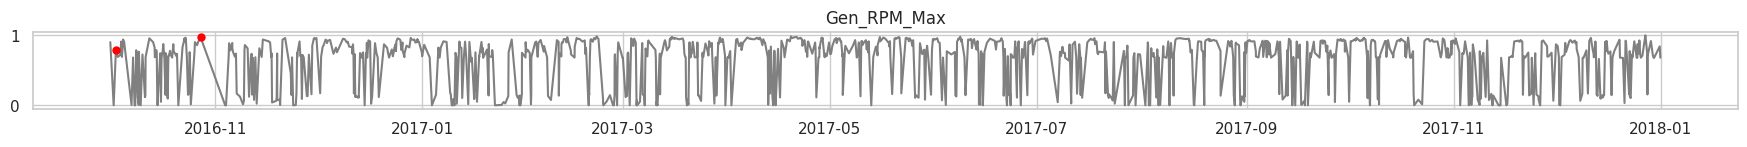

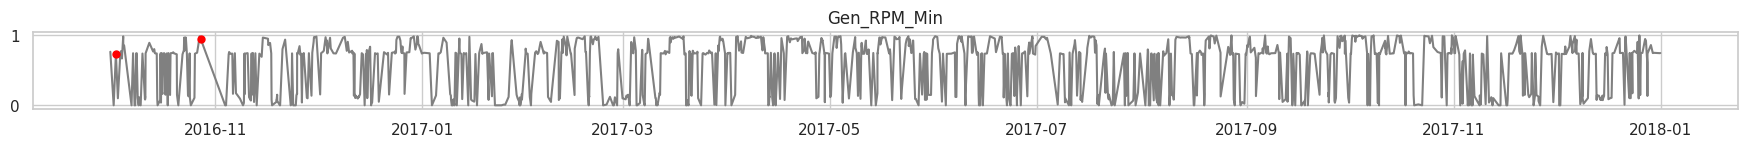

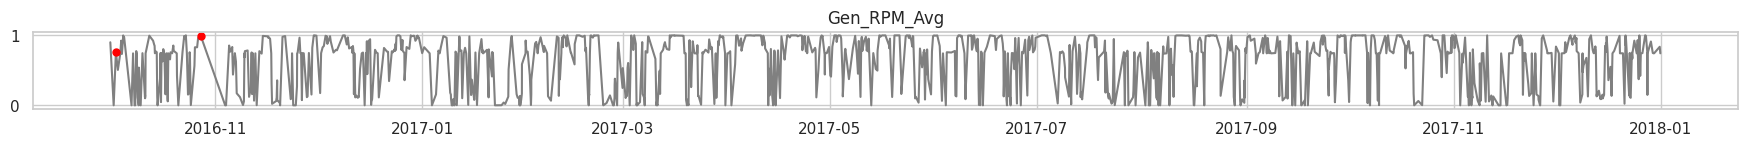

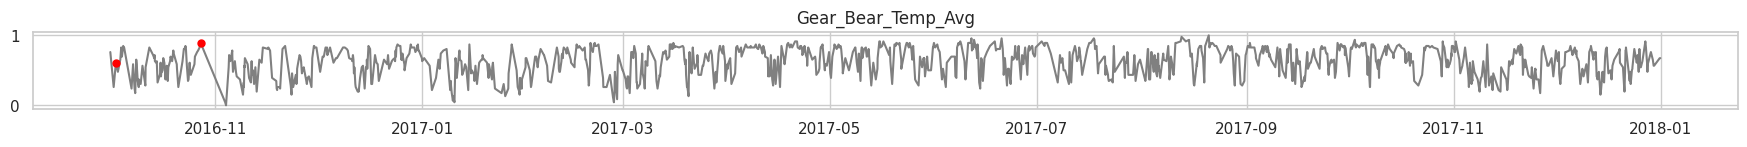

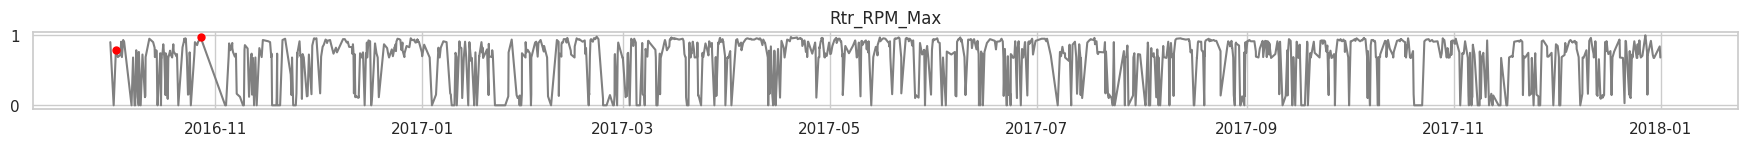

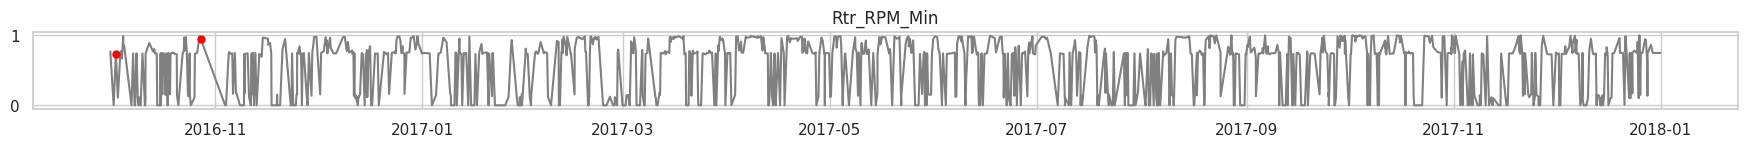

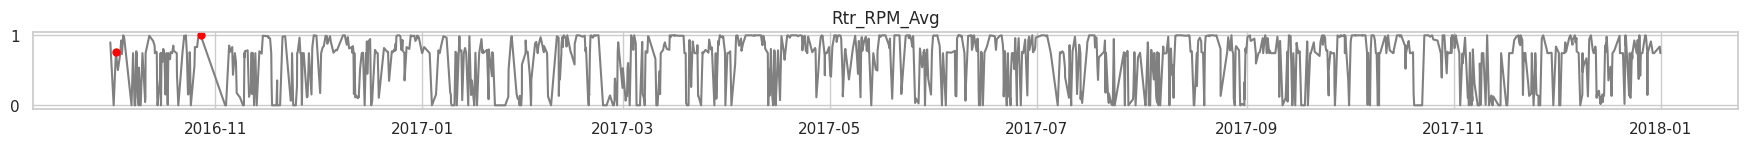

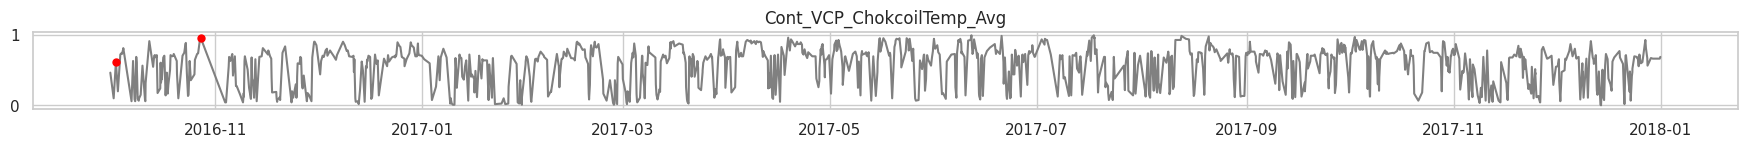

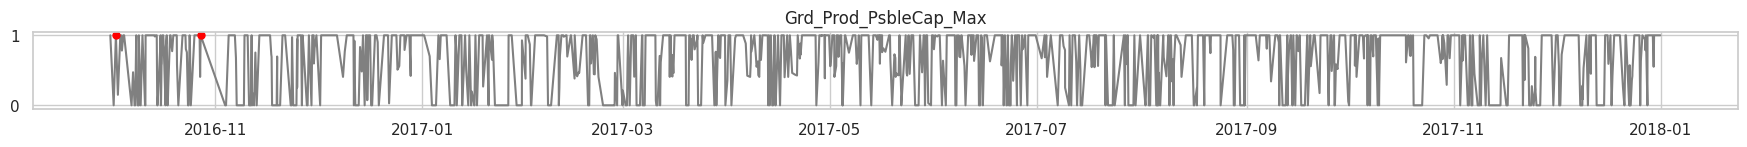

In [383]:
for sensor in sensor_cols:
    plot = plt.figure(figsize=(22,1))
    plot = plt.plot(testhy[sensor], color='grey')
    plot = plt.plot(broken_rows00[sensor], linestyle='none', marker='.', color='red', markersize=10)
    plot = plt.title(sensor)
    plt.xlim()

    plt.show()

In [384]:
train=trainhy.drop(columns=['fault'])
test=testhy.drop(columns=['fault'])

In [385]:
scaler = preprocessing.MinMaxScaler()
# normalize the data

X_train = scaler.fit_transform(train)
X_test = scaler.transform(test)
scaler_filename = "scaler_data"
joblib.dump(scaler, scaler_filename)

['scaler_data']

In [386]:
# reshape inputs for LSTM [samples, timesteps, features]
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
print("Training data shape:", X_train.shape)
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])
print("Test data shape:", X_test.shape)

Training data shape: (702, 1, 9)
Test data shape: (1302, 1, 9)


In [387]:
# define the autoencoder network model
def autoencoder_model(X):
    inputs = Input(shape=(X.shape[1], X.shape[2]))
    L1 = LSTM(16, activation='relu', return_sequences=True,
              kernel_regularizer=regularizers.l2(0.00))(inputs)
    L2 = LSTM(4, activation='relu', return_sequences=False)(L1)
    L3 = RepeatVector(X.shape[1])(L2)
    L4 = LSTM(4, activation='relu', return_sequences=True)(L3)
    L5 = LSTM(16, activation='relu', return_sequences=True)(L4)
    output = TimeDistributed(Dense(X.shape[2]))(L5)
    model = Model(inputs=inputs, outputs=output)
    return model

In [388]:
# create the autoencoder model
model = autoencoder_model(X_train)
model.compile(optimizer='adam', loss='mae')
model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 1, 9)]            0         
                                                                 
 lstm_12 (LSTM)              (None, 1, 16)             1664      
                                                                 
 lstm_13 (LSTM)              (None, 4)                 336       
                                                                 
 repeat_vector_3 (RepeatVec  (None, 1, 4)              0         
 tor)                                                            
                                                                 
 lstm_14 (LSTM)              (None, 1, 4)              144       
                                                                 
 lstm_15 (LSTM)              (None, 1, 16)             1344      
                                                           

In [389]:
# fit the model to the data
nb_epochs = 50
batch_size = 5
history = model.fit(X_train, X_train, epochs=nb_epochs, batch_size=batch_size,
                  validation_split=0.05).history

Epoch 1/50
134/134 [==============================] - 7s 10ms/step - loss: 0.5377 - val_loss: 0.5348
Epoch 2/50
134/134 [==============================] - 1s 6ms/step - loss: 0.2315 - val_loss: 0.0870
Epoch 3/50
134/134 [==============================] - 1s 6ms/step - loss: 0.0800 - val_loss: 0.0659
Epoch 4/50
134/134 [==============================] - 1s 6ms/step - loss: 0.0646 - val_loss: 0.0574
Epoch 5/50
134/134 [==============================] - 1s 5ms/step - loss: 0.0593 - val_loss: 0.0542
Epoch 6/50
134/134 [==============================] - 1s 6ms/step - loss: 0.0577 - val_loss: 0.0527
Epoch 7/50
134/134 [==============================] - 1s 6ms/step - loss: 0.0570 - val_loss: 0.0540
Epoch 8/50
134/134 [==============================] - 1s 8ms/step - loss: 0.0562 - val_loss: 0.0525
Epoch 9/50
134/134 [==============================] - 1s 9ms/step - loss: 0.0556 - val_loss: 0.0523
Epoch 10/50
134/134 [==============================] - 1s 8ms/step - loss: 0.0554 - val_loss: 0.051

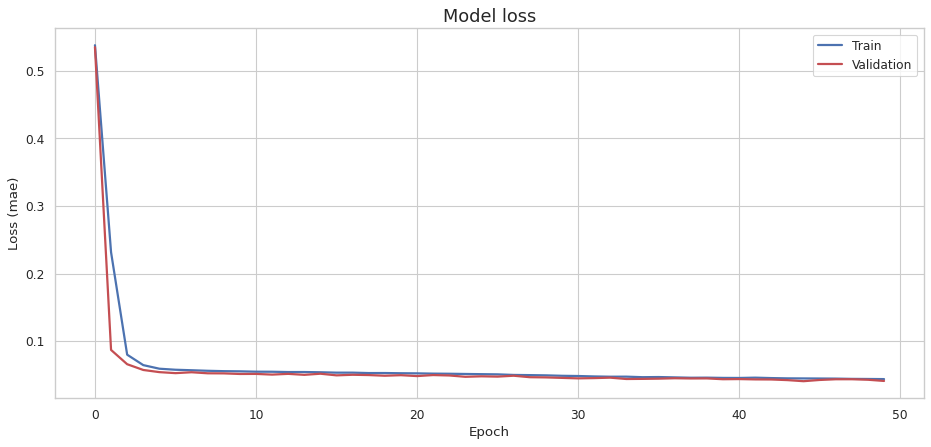

In [390]:
# plot the training losses
fig, ax = plt.subplots(figsize=(14, 6), dpi=80)
ax.plot(history['loss'], 'b', label='Train', linewidth=2)
ax.plot(history['val_loss'], 'r', label='Validation', linewidth=2)
ax.set_title('Model loss', fontsize=16)
ax.set_ylabel('Loss (mae)')
ax.set_xlabel('Epoch')
ax.legend(loc='upper right')
plt.show()

In [391]:
# plot the loss distribution of the training set
X_pred = model.predict(X_train)
X_pred = X_pred.reshape(X_pred.shape[0], X_pred.shape[2])
X_pred = pd.DataFrame(X_pred, columns=train.columns)
X_pred.index = train.index

scored = pd.DataFrame(index=train.index)
Xtrain = X_train.reshape(X_train.shape[0], X_train.shape[2])
scored['Loss_mae'] = np.mean(np.abs(X_pred-Xtrain), axis = 1)
#plt.figure(figsize=(16,9), dpi=80)
#plt.title('Loss Distribution', fontsize=16)
#sns.distplot(scored['Loss_mae'], bins = 20, kde= True, color = 'blue');
#plt.xlim([0.0,.5])

22/22 [==============================] - 1s 2ms/step


Otomatik olarak belirlenen eşik değeri: 0.23443555031412142
Toplam anomalilerin sayısı: 0


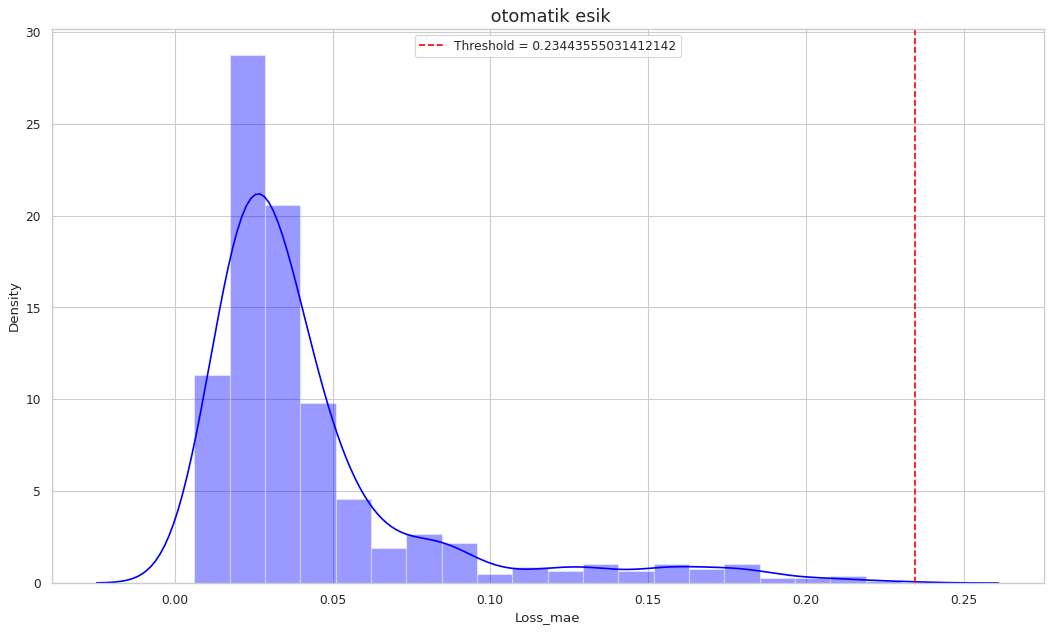

In [392]:
# Kayıp değerlerini alın
loss_values = scored['Loss_mae'].values

# Kayıp değerlerinin z-skorlarını hesaplayın
z_scores = (loss_values - np.mean(loss_values)) / np.std(loss_values)

# Eşik değeri için bir z-score belirleyin
threshold_z_score = 5 # Örnek olarak, 3.0 z-score'u kullanıyoruz

# Eşik değeri hesaplayın
threshold_value = np.mean(loss_values) + threshold_z_score * np.std(loss_values)

# Eşik değeri görselleştirin
plt.figure(figsize=(16, 9), dpi=80)
plt.title(' otomatik esik', fontsize=16)
sns.distplot(scored['Loss_mae'], bins=20, kde=True, color='blue')
plt.axvline(x=threshold_value, color='red', linestyle='--', label=f'Threshold = {threshold_value}')
plt.legend()

# Eşik değerini kullanarak anomalileri tespit edin
anomalies = scored[scored['Loss_mae'] > threshold_value]

# Eşik değerini ve tespit edilen anomalileri yazdırın
print(f"Otomatik olarak belirlenen eşik değeri: {threshold_value}")
print(f"Toplam anomalilerin sayısı: {len(anomalies)}")


In [393]:
# calculate the loss on the test set
TRH=threshold_value
TRH2=TRH/1.5

X_pred = model.predict(X_test)
X_pred = X_pred.reshape(X_pred.shape[0], X_pred.shape[2])
X_pred = pd.DataFrame(X_pred, columns=test.columns)
X_pred.index = test.index

scored = pd.DataFrame(index=test.index)
Xtest = X_test.reshape(X_test.shape[0], X_test.shape[2])
scored['Loss_mae'] = np.mean(np.abs(X_pred-Xtest), axis = 1)
scored['Threshold'] = TRH
scored['Anomaly'] = scored['Loss_mae'] > scored['Threshold']
scored.head()

41/41 [==============================] - 0s 2ms/step


,Loss_mae,Threshold,Anomaly
Timestamp,,,
2016-10-01 01:30:00+00:00,0.066121,0.234436,False
2016-10-02 00:50:00+00:00,0.009493,0.234436,False
2016-10-02 01:10:00+00:00,0.009493,0.234436,False
2016-10-02 17:00:00+00:00,0.016363,0.234436,False
2016-10-03 07:00:00+00:00,0.177876,0.234436,False


In [394]:
lossc=np.mean(np.abs(X_pred-Xtest), axis = 1)
lossc=pd.DataFrame(lossc)

lossc['ema']= lossc.rolling(60, min_periods=1).mean()
lossc['dtres']=lossc['ema']/2+TRH2
#lossc['dtres']=lossc['ema']+TRH
lossc

,0,ema,dtres
Timestamp,,,
2016-10-01 01:30:00+00:00,0.066121,0.066121,0.189351
2016-10-02 00:50:00+00:00,0.009493,0.037807,0.175194
2016-10-02 01:10:00+00:00,0.009493,0.028369,0.170475
2016-10-02 17:00:00+00:00,0.016363,0.025367,0.168974
2016-10-03 07:00:00+00:00,0.177876,0.055869,0.184225
...,...,...,...
2017-12-29 14:10:00+00:00,0.044926,0.056260,0.184420
2017-12-29 20:10:00+00:00,0.085022,0.057016,0.184798
2017-12-29 23:20:00+00:00,0.054767,0.057558,0.185070


In [395]:
scored0 = pd.DataFrame(index=test.index)
scored0['Loss_mae'] = np.mean(np.abs(X_pred-Xtest), axis = 1)
scored0['Threshold'] = lossc['dtres']
scored0['Anomaly'] = scored0['Loss_mae'] > scored0['Threshold']
scored0.head()

,Loss_mae,Threshold,Anomaly
Timestamp,,,
2016-10-01 01:30:00+00:00,0.066121,0.189351,False
2016-10-02 00:50:00+00:00,0.009493,0.175194,False
2016-10-02 01:10:00+00:00,0.009493,0.170475,False
2016-10-02 17:00:00+00:00,0.016363,0.168974,False
2016-10-03 07:00:00+00:00,0.177876,0.184225,False


In [396]:
# calculate the same metrics for the training set
# and merge all data in a single dataframe for plotting
X_pred_train = model.predict(X_train)
X_pred_train = X_pred_train.reshape(X_pred_train.shape[0], X_pred_train.shape[2])
X_pred_train = pd.DataFrame(X_pred_train, columns=train.columns)
X_pred_train.index = train.index

scored_train = pd.DataFrame(index=train.index)
scored_train['Loss_mae'] = np.mean(np.abs(X_pred_train-Xtrain), axis = 1)
scored_train['Threshold'] = TRH
scored_train['Anomaly'] = scored_train['Loss_mae'] > scored_train['Threshold']
scored = pd.concat([scored_train, scored])

22/22 [==============================] - 0s 3ms/step


In [397]:
scored0_train = pd.DataFrame(index=train.index)
scored0_train['Loss_mae'] = np.mean(np.abs(X_pred_train-Xtrain), axis = 1)

lossc1=np.mean(np.abs(X_pred_train-Xtrain), axis = 1)
lossc1=pd.DataFrame(lossc1)

lossc1['ema']= lossc1.rolling(60, min_periods=1).mean()
#lossc1['dtres']=(lossc1[0]-lossc1['ema'])/2+TRH
lossc1['dtres']=lossc1['ema']/2+TRH2

scored0_train['Threshold'] = lossc1['dtres']
scored0_train['Anomaly'] = scored0_train['Loss_mae'] > scored0_train['Threshold']
scored0 = pd.concat([scored0_train, scored0])

In [398]:
#broken_rows2=data_af['Fault']
broken_rows2 = trainhy['fault']
broken_rows2=pd.DataFrame(broken_rows2)
broken_rows2 = broken_rows2[broken_rows2['fault']==1]

broken_rows2

,fault
Timestamp,
2016-07-24 17:00:00+00:00,1
2016-09-04 08:00:00+00:00,1


In [399]:
broken_rows2['Loss_mae']=scored['Loss_mae']
broken_rows2['Threshold']=scored['Threshold']

In [400]:
broken_rows20 = trainhy['fault']
broken_rows20=pd.DataFrame(broken_rows20)
broken_rows20 = broken_rows20[broken_rows20['fault']==1]
broken_rows20['Loss_mae']=scored0['Loss_mae']
broken_rows20['Threshold']=scored0['Threshold']

In [401]:
broken_rows2=pd.DataFrame(broken_rows2)

broken_rows20=pd.DataFrame(broken_rows20)

In [402]:
scored1=scored
scored10=scored0
broken_rows2=broken_rows2.sort_index()
broken_rows20=broken_rows20.sort_index()

In [403]:
broken_rows2=broken_rows2[['Loss_mae','fault']]
broken_rows20=broken_rows20[['Loss_mae','fault']]

In [404]:
scored1=pd.DataFrame(scored1)
scored10=pd.DataFrame(scored10)

scored11=scored1
scored110=scored10

In [405]:
scored11['Anomaly'].replace(False,0, inplace=True)
scored11['Anomaly'].replace(True,1, inplace=True)

scored110['Anomaly'].replace(False,0, inplace=True)
scored110['Anomaly'].replace(True,1, inplace=True)

scored11

,Loss_mae,Threshold,Anomaly
Timestamp,,,
2016-01-01 12:30:00+00:00,0.042203,0.234436,0
2016-01-01 12:50:00+00:00,0.050030,0.234436,0
2016-01-02 04:40:00+00:00,0.035850,0.234436,0
2016-01-03 03:50:00+00:00,0.012025,0.234436,0
2016-01-03 05:20:00+00:00,0.029015,0.234436,0
...,...,...,...
2017-12-29 14:10:00+00:00,0.044926,0.234436,0
2017-12-29 20:10:00+00:00,0.085022,0.234436,0
2017-12-29 23:20:00+00:00,0.054767,0.234436,0


In [406]:
scored1 = scored1.iloc[ :last_40percent, :]
scored10 =scored10.iloc[ :last_40percent, :]
scored10

,Loss_mae,Threshold,Anomaly
Timestamp,,,
2016-01-01 12:30:00+00:00,0.042203,0.177392,0
2016-01-01 12:50:00+00:00,0.050030,0.179348,0
2016-01-02 04:40:00+00:00,0.035850,0.177637,0
2016-01-03 03:50:00+00:00,0.012025,0.173804,0
2016-01-03 05:20:00+00:00,0.029015,0.173203,0
...,...,...,...
2017-04-05 01:20:00+00:00,0.027670,0.178213,0
2017-04-05 12:40:00+00:00,0.037357,0.178276,0
2017-04-06 07:20:00+00:00,0.029305,0.178153,0


In [407]:
import plotly.express as px
fig = px.scatter(broken_rows2['Loss_mae'], title='anomali tespiti',color_discrete_sequence=['red'])
fig.add_trace(px.line(scored1).data[0])
fig.add_trace(px.line(scored1).data[1])
fig.add_trace(px.line(scored10).data[1])

fig.show()

In [408]:
last_percent = round(len(scored) - len(scored)*perc)
sc_train = scored.iloc[ :last_percent, :]
sc_test= scored.iloc[last_percent: ,:]

sc_test

,Loss_mae,Threshold,Anomaly
Timestamp,,,
2017-04-07 18:40:00+00:00,0.062784,0.234436,False
2017-04-07 20:50:00+00:00,0.025431,0.234436,False
2017-04-07 23:20:00+00:00,0.048443,0.234436,False
2017-04-08 19:40:00+00:00,0.023511,0.234436,False
2017-04-08 20:00:00+00:00,0.023482,0.234436,False
...,...,...,...
2017-12-29 14:10:00+00:00,0.044926,0.234436,False
2017-12-29 20:10:00+00:00,0.085022,0.234436,False
2017-12-29 23:20:00+00:00,0.054767,0.234436,False


In [409]:
last_percent = round(len(scored0) - len(scored0)*perc)
sc_train0 = scored0.iloc[ :last_percent, :]
sc_test0= scored0.iloc[last_percent: ,:]

sc_test0

,Loss_mae,Threshold,Anomaly
Timestamp,,,
2017-04-07 18:40:00+00:00,0.062784,0.179076,False
2017-04-07 20:50:00+00:00,0.025431,0.179210,False
2017-04-07 23:20:00+00:00,0.048443,0.179381,False
2017-04-08 19:40:00+00:00,0.023511,0.179374,False
2017-04-08 20:00:00+00:00,0.023482,0.179442,False
...,...,...,...
2017-12-29 14:10:00+00:00,0.044926,0.184420,False
2017-12-29 20:10:00+00:00,0.085022,0.184798,False
2017-12-29 23:20:00+00:00,0.054767,0.185070,False


In [410]:
y_pred=sc_test['Anomaly']

tres=sc_test['Threshold']

y_true=testhy['fault']

lossm=sc_test['Loss_mae']

y_pred

Timestamp
2017-04-07 18:40:00+00:00    False
2017-04-07 20:50:00+00:00    False
2017-04-07 23:20:00+00:00    False
2017-04-08 19:40:00+00:00    False
2017-04-08 20:00:00+00:00    False
                             ...  
2017-12-29 14:10:00+00:00    False
2017-12-29 20:10:00+00:00    False
2017-12-29 23:20:00+00:00    False
2017-12-31 15:10:00+00:00    False
2017-12-31 19:20:00+00:00    False
Name: Anomaly, Length: 802, dtype: bool

In [411]:
y_pred0=sc_test0['Anomaly']

tres0=sc_test0['Threshold']

y_true0=testhy['fault']

lossm0=sc_test0['Loss_mae']

In [412]:
y_pred=pd.DataFrame(y_pred)
y_pred1=y_pred['Anomaly'].replace(False, 0, inplace=True)
y_pred1=y_pred['Anomaly'].replace(True, 1, inplace=True)
y_pred0=pd.DataFrame(y_pred0)
y_pred10=y_pred0['Anomaly'].replace(False, 0, inplace=True)
y_pred10=y_pred0['Anomaly'].replace(True, 1, inplace=True)

y_true1=pd.DataFrame(y_true)
y_true2=pd.DataFrame(y_true)
lossm=pd.DataFrame(lossm)
y_true1['loss']=lossm
y_true1= y_true1.reindex(columns=['loss', 'fault'])

broken_rows1 = y_true1[y_true1['fault']==1]
broken_rows1=broken_rows1.sort_index()

sc_test1=sc_test
sc_test1['Anomaly'].replace(False, 0, inplace=True)
sc_test1['Anomaly'].replace(True, 1, inplace=True)

In [413]:
y_true10=pd.DataFrame(y_true)
y_true20=pd.DataFrame(y_true)
lossm=pd.DataFrame(lossm)
y_true10['loss']=lossm
y_true10= y_true10.reindex(columns=['loss', 'fault'])

broken_rows10 = y_true10[y_true10['fault']==1]
broken_rows10=broken_rows10.sort_index()

sc_test10=sc_test0
sc_test10['Anomaly'].replace(False, 0, inplace=True)
sc_test10['Anomaly'].replace(True, 1, inplace=True)

In [414]:
broken_rows1=pd.DataFrame(broken_rows1)
broken_rows10=pd.DataFrame(broken_rows10)


In [415]:
sc_test10=pd.DataFrame(sc_test10)
sc_test10

,Loss_mae,Threshold,Anomaly
Timestamp,,,
2017-04-07 18:40:00+00:00,0.062784,0.179076,0
2017-04-07 20:50:00+00:00,0.025431,0.179210,0
2017-04-07 23:20:00+00:00,0.048443,0.179381,0
2017-04-08 19:40:00+00:00,0.023511,0.179374,0
2017-04-08 20:00:00+00:00,0.023482,0.179442,0
...,...,...,...
2017-12-29 14:10:00+00:00,0.044926,0.184420,0
2017-12-29 20:10:00+00:00,0.085022,0.184798,0
2017-12-29 23:20:00+00:00,0.054767,0.185070,0


In [416]:
sc_test1=pd.DataFrame(sc_test1)
sc_test1

,Loss_mae,Threshold,Anomaly
Timestamp,,,
2017-04-07 18:40:00+00:00,0.062784,0.234436,0
2017-04-07 20:50:00+00:00,0.025431,0.234436,0
2017-04-07 23:20:00+00:00,0.048443,0.234436,0
2017-04-08 19:40:00+00:00,0.023511,0.234436,0
2017-04-08 20:00:00+00:00,0.023482,0.234436,0
...,...,...,...
2017-12-29 14:10:00+00:00,0.044926,0.234436,0
2017-12-29 20:10:00+00:00,0.085022,0.234436,0
2017-12-29 23:20:00+00:00,0.054767,0.234436,0


In [417]:
import plotly.express as px





fig2 = px.scatter(broken_rows1['loss'], title='anomali tespiti',color_discrete_sequence=['red'])

fig2.add_trace(px.line(sc_test1).data[0])
fig2.add_trace(px.line(sc_test1).data[1])
fig2.add_trace(px.line(sc_test10).data[1])

fig2.data[-2].line.color = 'orange'
fig2.data[-1].line.color = 'green'
fig2.show()

In [418]:
y_true2=pd.DataFrame(y_true2)


In [419]:
y_pred=pd.DataFrame(y_pred)
y_pred.rename(columns={'Anomaly': 'fault'}, inplace=True)
y_pred['fault'].replace(False,0, inplace=True)
y_pred['fault'].replace(True,1, inplace=True)

In [420]:
y_pred0=pd.DataFrame(y_pred0)
y_pred0.rename(columns={'Anomaly': 'Fault'}, inplace=True)
y_pred0['Fault'].replace(False,0, inplace=True)
y_pred0['Fault'].replace(True,1, inplace=True)

In [421]:
y_true2 = y_true2.to_numpy()
y_true20 = y_true20.to_numpy()
y_pred = y_pred.to_numpy()
y_pred0 = y_pred0.to_numpy()

In [422]:
y_true2 = y_true2[:len(y_pred)]
y_true20 = y_true20[:len(y_pred0)]

In [423]:
y_pred = np.pad(y_pred, (0, len(y_true2) - len(y_pred)), 'constant')
y_pred0 = np.pad(y_pred0, (0, len(y_true20) - len(y_pred0)), 'constant')


In [424]:
# Confusion matrix hesapla
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp, = confusion_matrix(y_true2, y_pred).ravel()
tn0, fp0, fn0, tp0 =confusion_matrix(y_true20, y_pred0).ravel()
# PR ve FPR hesapla

tpr = tp / (tp + fn)
fpr = fp / (fp + tn)

tpr0 = tp0 / (tp0 + fn0)
fpr0 = fp0 / (fp0 + tn0)

accuracy = np.mean(y_true2 == y_pred)
accuracy0 = np.mean(y_true20 == y_pred0)
# Sonuçları yazdır
print("Fix TPR (Sensitivity):", tpr)
print("Fix FPR (1-Specificity):", fpr)
print("Fix Accuracy:", accuracy)

Fix TPR (Sensitivity): 0.0
Fix FPR (1-Specificity): 0.00125
Fix Accuracy: 0.9962593516209476


In [425]:
print("EMA TPR (Sensitivity):", tpr0)
print("EMA FPR (1-Specificity):", fpr0)
print("EMA Accuracy:", accuracy0)

EMA TPR (Sensitivity): 0.0
EMA FPR (1-Specificity): 0.01875
EMA Accuracy: 0.9788029925187033


In [426]:
print(classification_report(y_true2, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       800
           1       0.00      0.00      0.00         2

    accuracy                           1.00       802
   macro avg       0.50      0.50      0.50       802
weighted avg       1.00      1.00      1.00       802



In [427]:
print(classification_report(y_true20, y_pred0))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       800
           1       0.00      0.00      0.00         2

    accuracy                           0.98       802
   macro avg       0.50      0.49      0.49       802
weighted avg       0.99      0.98      0.99       802



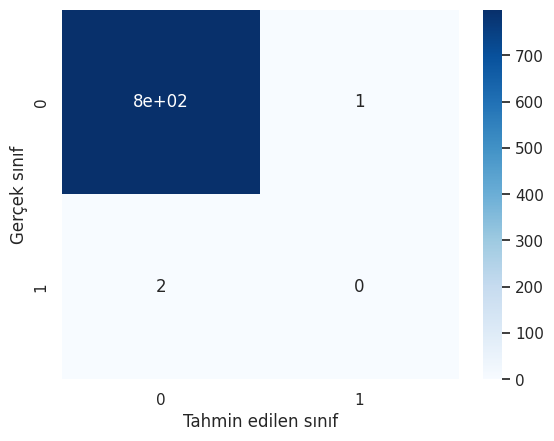

In [428]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Confusion matrix hesapla
cm = confusion_matrix(y_true2, y_pred)

# Görselleştir
sns.heatmap(cm, annot=True, cmap="Blues")
plt.xlabel("Tahmin edilen sınıf")
plt.ylabel("Gerçek sınıf")
plt.show()

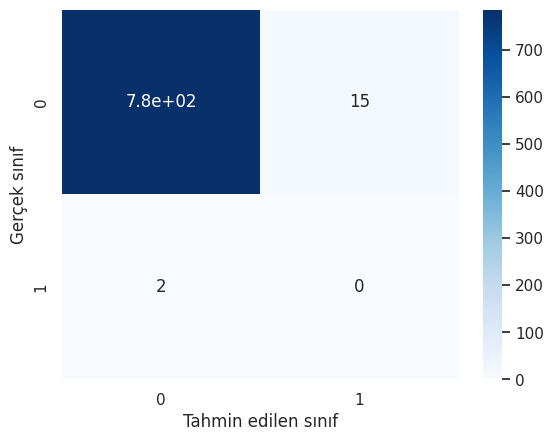

In [429]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Confusion matrix hesapla
cm0 = confusion_matrix(y_true20, y_pred0)

# Görselleştir
sns.heatmap(cm0, annot=True, cmap="Blues")
plt.xlabel("Tahmin edilen sınıf")
plt.ylabel("Gerçek sınıf")
plt.show()